# NIRSpec Merged Table

<a href="https://colab.research.google.com/github/dawn-cph/dja/blob/master/assets/post_files/2025-05-01-nirspec-merged-table-v4.ipynb"> <img src="https://colab.research.google.com/assets/colab-badge.svg"> </a>

Demo of full merged table of NIRSpec spectra reduced with [msaexp](http://github.com/gbrammer/msaexp).  The merged columns are taken from the database tables

- `nirspec_extractions` - Basic spectrum parameters (grating, mask, exposure time, etc.)
- `nirspec_redshifts` - Redshift fit results, emission line fluxes
- `nirspec_redshifts_manual` - Grades and comments from visual inspection
- `nirspec_integrated` - Observed- and rest-frame filters integrated through the spectra at the derived redshift
- `grizli_photometry` - Photometry and some eazy outputs of the nearest counterpart in the DJA/grizli photometric catalogs

The public spectra are shown in a large overview table at [public_prelim_v4.2.html](https://s3.amazonaws.com/msaexp-nirspec/extractions/public_prelim_v4.2.html).

## 5 September 2025

The notebook has been updated to use a new version ``v4.4`` of the merged table.

- Includes PRISM spectra from the [CANUCS GTO](https://niriss.github.io/data_release1.html) program, along with a number of additional public datasets
- Merged files of the 1D spectra in all gratings are now available, with some [grating examples](#Merged-1D-grating-spectra) added at the end of the demo.
- The summary table and tables of compiled spectra now include *all* available spectra, whether or not they had been processed with the redshift fit algorithm.
- Companion overview table at [nirspec_public_v4.4.html](https://s3.amazonaws.com/msaexp-nirspec/extractions/nirspec_public_v4.4.html?&grade_min=2.5&grade_max=3.5).  (Now has the same length as the summary table here.)
- All files provided at the static [DOI 10.5281/zenodo.1547235](https://zenodo.org/records/15472354).  See README.md at the zenodo page for more information on the release contents.

# README

This repository is a snapshot of the public JWST NIRSpec spectra processed with the msaexp pipeline. Please refer to and cite [de Graaff et al. (2024)](https://www.aanda.org/articles/aa/abs/2025/05/aa52186-24/aa52186-24.html) and [Heintz et al. (2025)](https://www.aanda.org/articles/aa/abs/2025/01/aa50243-24/aa50243-24.html) for the main presentation of the ``msaexp`` pipeline.

This release corresponds to the ``v4`` version of the spectral extractions, which significantly extends the wavelength range of the extracted spectra to regions that may suffer contamination of overlapping spectral orders.  The sensitivity of the higher orders is strongly weighted toward the blue side of the spectrum for all gratings, so, in practice, relatively red galaxies often suffer relatively minor order contamination.

Please refer to and cite this [DOI 10.5281/zenodo.1547235](https://zenodo.org/records/15472354) and [Valentino et al. (2025)](https://ui.adsabs.harvard.edu/abs/2025A&A...699A.358V) when using this specific data release and the ``v4`` spectra for a presentation of the extended extractions. For more information and updates, please refer to the DJA Blog Post: https://dawn-cph.github.io/dja/blog/2025/05/01/nirspec-merged-table-v4/



## Data Content

This release provides version 4 of the NIRSpec Merged Table, a comprehensive catalog of uniformly reduced and analyzed JWST/NIRSpec spectra.
The data have been processed using the [msaexp](https://github.com/gbrammer/msaexp) and [grizli](https://github.com/gbrammer/grizli) pipelines and are publicly available through the DAWN JWST Archive (DJA).
The catalog integrates multiple data products, including spectral extractions, redshift measurements, emission line fluxes, and photometric associations.

The merged table consolidates information from several database tables:

- `nirspec_extractions`: Basic spectrum parameters (e.g., grating, mask, exposure time).
- `nirspec_redshifts`: Redshift fit results and emission line fluxes.
- `nirspec_redshifts_manual`: Grades and comments from visual inspection.
- `nirspec_integrated`: Observed- and rest-frame filters integrated through the spectra at the derived redshift.
- `grizli_photometry`: Photometry and some EAZY outputs of the nearest counterpart in the DJA/grizli photometric catalogs.

The catalog includes 80,367 entries, each corresponding to a unique NIRSpec spectrum.
Each entry contains metadata such as source ID, coordinates, grating/filter configuration, exposure time, redshift estimates, emission line measurements, and photometric associations.

| N     |  Grating-Filter | Concatenated 1D spectrum file |
|------:|:---------------:|:------------------------------|
|   113 |  G140H-F070LP   |  dja_msaexp_emission_lines_v4.4.g140h-f070lp_spectra.fits  |
|   684 |  G140H-F100LP   |  dja_msaexp_emission_lines_v4.4.g140h-f100lp_spectra.fits  |
|  5851 |  G140M-F070LP   |  dja_msaexp_emission_lines_v4.4.g140m-f070lp_spectra.fits  |
|  2165 |  G140M-F100LP   |  dja_msaexp_emission_lines_v4.4.g140m-f100lp_spectra.fits  |
|  6179 |  G235H-F170LP   |  dja_msaexp_emission_lines_v4.4.g235h-f170lp_spectra.fits  |
|  8000 |  G235M-F170LP   |  dja_msaexp_emission_lines_v4.4.g235m-f170lp_spectra.fits  |
|  8820 |  G395H-F290LP   |  dja_msaexp_emission_lines_v4.4.g395h-f290lp_spectra.fits  |
| 13606 |  G395M-F290LP   |  dja_msaexp_emission_lines_v4.4.g395m-f290lp_spectra.fits  |
| 34949 |  PRISM-CLEAR    |  dja_msaexp_emission_lines_v4.4.prism_spectra.fits         |

## Usage Notes

- Data Format: The main catalog is provided in compressed CSV format. Column descriptions, including units and formats, are detailed in the accompanying columns CSV file.

The redshift and line fluxes are derived with the functions msaexp.fit_redshift and msaexp.plot_spectrum. The continuum is modelled as a combination of splines, whose coefficient are listed in the table. Emission lines are superimposed as Gaussian profiles, smoothed by the instrumental resolution (increased by a factor of 1.3x compared with the nominal line spread functions in the JWST User Documentation, JDox, see de Graaff+2025) and a fixed line velocity width of 100 km/s. Equivalent widths in angstrom in the observed frame are also reported. A dictionary with the available lines and their rest-frame wavelengths in vacuum can be generated with ``grizli.utils.get_line_wavelengths()``. The fit is performed with a least square template method. The uncertainties are rescaled with a polynomial curve prior to fitting such that ``(flux - model) / (err * scl)`` residuals are ``N(0,1)`` using ``msaexp.spectrum.calc_uncertainty_scale``. A systematic uncertainty floor of 2% is introduced. The robustness of the redshift solution is flagged with visual inspection according to the following scheme:
- **Grade 3**: Robust redshift from one or more emission absorption features
- **Grade 2**: Ambiguous continuum features, perhaps only one line or low confidence lines
- **Grade 1**: No clear features in the spectrum to constrain the redshift
- **Grade 0**: Spectrum suffers some data quality issue and should
- **Grade -1**: Fit not performed or graded

If multiple spectra of the same sources are available, a common best redshift solution is stored in the z_best column.

- Spectral Data: Each entry includes links to the corresponding 2D spectra in fits and png format, which can be accessed through the DJA interface or the public spectra overview page at: [nirspec_public_v4.4.html](https://s3.amazonaws.com/msaexp-nirspec/extractions/nirspec_public_v4.4.html)
The 1D spectra in the fits tables in this release are in the format generated by ``msaexp``. The columns are described in [dja_msaexp_emission_lines_v4.4.columns.csv](#Column-descriptions).

-  Some masks that provide spectra of predominantly local sources in the MW or in nearby
galaxies were not processed through the redshift fitting procedure. The general spectrum metadata
is included in the summary table and the spectra are include in the compiled tables, but the columns
of quantities derived from the redshift fit (e.g., emission line fluxes) are not populated.

- If existing, a comparison with the previous v3 version the spectra generated with msaexp is available at the same link on the DJA interface.  

- Photometric Associations: Photometric data are matched to the nearest counterparts in the DJA/grizli catalogs, providing additional context for each spectroscopic observation. The latest public versions of the DJA/grizli catalogs can are described here: [https://dawn-cph.github.io/dja/imaging/v7/](https://dawn-cph.github.io/dja/imaging/v7/)
The latest ``v7*`` version of the imaging mosaics and catalogs can be retrieved here: [https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7/index.html](https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7/index.html)
A description of the data reduction and catalog creation is available on the DJA interface and in Valentino+2023.

## Caveats

- An effective extended-source path-loss correction for light outside of the slitlet for each source using the a priori position within the shutter and assuming an azimuthally symmetric Gaussian profile is applied to each spectrum in this release (de Graaff et al. 2025, Section 3). However, the spectra are not rescaled to match the observed photometry in the "phot_" columns.
- The flux calibration is derived from calibration, monitoring, and scientific programs (Valentino et al. 2025). However, residual features in spectra due to an imperfect cross-calibration of different overlapping orders are still present in the released spectra.
- Examples of second order corrections are presented in Ito et al. (2025), where medium-resolution grating spectra beyond their nominal coverage deviate from the prism counterpart (Figure C.1 in appendix in Ito et al. 2025). Moreover, a significant downturn is present in prism spectra at wavelengths longer than 5.2 µm. These second order corrections are largely mitigated cross-calibrating all the available spectra and photometry by means of simple low-order polynomial corrections, for example available in spectrophotometric modeling codes. Future calibration programs dedicated to reconstruction of the sensitivity curves in the extended spectra at different location of the MSA will allow for refined absolute calibrations.
  


## Software

The data processing and analysis utilized the following software packages:

- msaexp: ``v0.9.8.dev3+ge0e3f39.d20250429``
- grizli: ``v1.12.12.dev5+g5896d62.d20250426``
- eazy-py: ``v0.8.5``


## Citations

We encourage users to refer to the original works describing the datasets collected in this release. Relevant references, compiled to the best of our knowledge, are available here: [https://dawn-cph.github.io/dja/spectroscopy/nirspec/](https://dawn-cph.github.io/dja/spectroscopy/nirspec/).  Please file an [Issue](https://github.com/dawn-cph/dja/issues) on the DJA website repository if you would prefer a different citation for your own dataset.

Works that make use of the products of the DJA should cite this DOI and relevant articles describing them:

1) Msaexp pipeline and methods, v3 and previous spectroscopic compilation releases:
- de Graaff, A., Brammer, G., Weibel, A.,  et al., "RUBIES: a complete census of the bright and red distant Universe with JWST/NIRSpec", A&A, 697, 189 (2025)
- Heintz, K. E., Brammer, G., Watson, D., et al., "The JWST-PRIMAL archival survey: A JWST/NIRSpec reference sample for the physical properties and Lyman-α absorption and emission of ∼600 galaxies at z = 5.0−13.4", A&A, 693, 60 (2025)
- Brammer G., "msaexp: NIRSpec analyis tools", 10.5281/zenodo.7299500 (2022)


2) Spectroscopic release v4 and extended spectra:
- Valentino, F., Heintz, K. E., Brammer, G. et al., "Gas outflows in two recently quenched galaxies at z = 4 and 7", A&A, 699, 358 (2025)
- Pollock, C., Gottumukkala, R., Heintz, K. E. et al., "Novel z~10 auroral line measurements extend the gradual offset of the FMR deep into the first Gyr of cosmic time ", arXiv:2506.15779 (2025)

3) Grizli pipeline:
- Brammer G., "grizli", https://zenodo.org/records/8370018 (2023)

4) Imaging release:
- Valentino, F., Brammer, G., Gould, K. M. L. et al., "An Atlas of Color-selected Quiescent Galaxies at z > 3 in Public JWST Fields", ApJ, 947, 20 (2023) 

# Demo

In [1]:
# Install dependencies, e.g., on Google Colab
try:
    import msaexp

except ImportError:

    ! pip install msaexp
    ! pip install git+https://github.com/karllark/dust_attenuation.git
    
    import eazy
    eazy.fetch_eazy_photoz()

In [2]:
%matplotlib inline

import os
import yaml

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

from scipy.spatial import cKDTree

import astropy.io.fits as pyfits
from astropy.utils.data import download_file
from astropy.cosmology import WMAP9
import astropy.units as u

import grizli
import grizli.catalog
from grizli import utils

import eazy
import msaexp

CACHE_DOWNLOADS = True

print(f'grizli version: {grizli.__version__}')
print(f'eazy-py version: {eazy.__version__}')
print(f'msaexp version: {msaexp.__version__}')

grizli version: 1.13.2.dev1+g1439c13c5.d20250908
eazy-py version: 0.8.5
msaexp version: 0.9.12.dev20+g2d24ffa54.d20250903


## Read the table

In [3]:
# Full table
version = "v4.0" # Original notebook release
version = "v4.3" # Updated August 11, 2025.  Includes CANUCS and some other additional masks.
version = "v4.4" # Updated September 5, 2025.  Include all public spectra even without redshift / line fits

URL_PREFIX = "https://s3.amazonaws.com/msaexp-nirspec/extractions"

# Use the Zenodo release
if version == "v4.4":
    URL_PREFIX = "https://zenodo.org/records/15472354/files/"

table_url = f"{URL_PREFIX}/dja_msaexp_emission_lines_{version}.csv.gz"

tab = utils.read_catalog(download_file(table_url, cache=CACHE_DOWNLOADS), format='csv')

### Column descriptions

In [4]:
columns_url = f"{URL_PREFIX}/dja_msaexp_emission_lines_{version}.columns.csv"
tab_columns = utils.read_catalog(download_file(columns_url, cache=CACHE_DOWNLOADS), format='csv')

# Set column metadata
for row in tab_columns:
    c = row['column']
    if row['unit'] != '--':
        tab[c].unit = row['unit']
    if row['format'] != '--':
        tab[c].format = row['format']
    if row['description'] != '--':
        tab[c].description = row['description']

tab.info()

<GTable length=80367>
        name         dtype   unit  format                                       description                                           class     n_bad
------------------- ------- ------ ------ ---------------------------------------------------------------------------------------- ------------ -----
               file   str57                                                                                           DJA filename       Column     0
              srcid   int64                                                                                Source ID from APT plan       Column     0
                 ra float64    deg    .8f                                                                         RA from APT plan       Column     0
                dec float64    deg    .8f                                                                        Dec from APT plan       Column     0
            grating    str5                                                   

## Add some preview columns to the table

In [5]:
RGB_URL = "https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord={ra}%2C{dec}"
tab['metafile'] = [m.split('_')[0] for m in tab['msamet']]
SLIT_URL = "https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord={ra}%2C{dec}&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile={metafile}"
FITS_URL = "https://s3.amazonaws.com/msaexp-nirspec/extractions/{root}/{file}"

tab['Thumb'] = [
    "<img src=\"{0}\" height=200px>".format(
        RGB_URL.format(**row['ra','dec'])
    )
    for row in tab
]

tab['Slit_Thumb'] = [
    "<img src=\"{0}\" height=200px>".format(
        SLIT_URL.format(**row['ra','dec','metafile'])
    )
    for row in tab
]

tab['Spectrum_fnu'] = [
    "<img src=\"{0}\" height=200px>".format(
        FITS_URL.format(**row['root','file']).replace('.spec.fits', '.fnu.png')
    )
    for row in tab
]

tab['Spectrum_flam'] = [
    "<img src=\"{0}\" height=200px>".format(
        FITS_URL.format(**row['root','file']).replace('.spec.fits', '.flam.png')
    )
    for row in tab
]

# CANUCS in a different bucket
canucs = np.isin(
    tab['root'],
    ['abell370-v4', 'macs0416-v4', 'macs0417-v4', 'macs1149-v4', 'macs1423-v4']
)

for j in tqdm(np.where(canucs)[0]):
    for c in ['Spectrum_fnu', 'Spectrum_flam']:
        tab[c][j] = tab[c][j].replace(
            'msaexp-nirspec/extractions',
            'grizli-canucs/nirspec'
        )

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1534/1534 [00:00<00:00, 97100.33it/s]


## zphot - zspec

Compare the "best" NIRSpec redshift with ``grade=3`` (grating if available, prism otherwise) to the photometric redshift in the matched catalogs.

13703


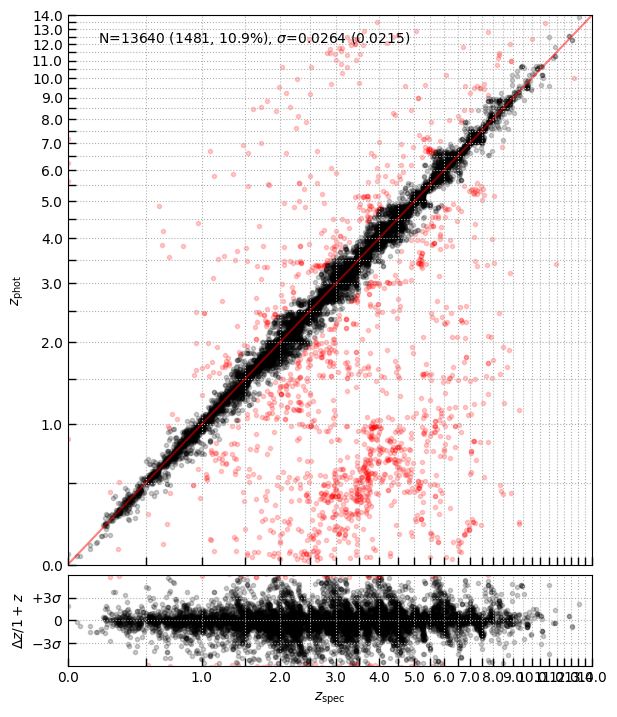

In [6]:
import eazy.utils
test = (tab['grade'] == 3) & (tab['z_phot'].filled(-1.) > 0)
test &= (tab['grating'] == 'PRISM')
print(test.sum())
_ = eazy.utils.zphot_zspec(tab['z_phot'][test], tab['z_best'][test], zmax=14)


In [7]:
# Counts by mask / program
utils.Unique(tab['root'], sort_counts=False)

   N  value     
====  ==========
 314  abell2744-castellano1-v4
 613  abell2744-castellano2-v4
 114  abell2744-ddt-v4
 462  abell2744-glass-v4
 299  abell370-v4
 141  aurora-gdn01-v4
 153  aurora-gdn02-v4
   9  bd-ic348-gto-v4
  25  bd-orion-gto-v4
 344  bd-orion-gto2-v4
 219  bluejay-north-v4
 224  bluejay-south-v4
  52  borg-0037m3337-v4
  39  borg-0314m6712-v4
  37  borg-0409m5317-v4
  36  borg-0440m5244-v4
  38  borg-0859p4114-v4
  48  borg-0955p4528-v4
  38  borg-1033p5051-v4
  43  borg-1437p5044-v4
  31  borg-2203p1851-v4
1107  cal-m31-pn2538-v4
 414  cal-ocen-degraaff-v4
  63  cantalupo-filament-02-v4
 338  capers-cos01-v4
 286  capers-cos04-v4
 377  capers-cos07-v4
 417  capers-cos10-v4
 292  capers-cos13-v4
 306  capers-cos16-v4
 377  capers-cos19-v4
 376  capers-egs44-v4
 396  capers-egs47-v4
 408  capers-egs49-v4
 415  capers-egs53-v4
 328  capers-egs55-v4
 389  capers-egs61-v4
 372  capers-egs65-v4
 351  capers-udsp1-v4
 302  capers-udsp2-v4
 281  capers-udsp3-v4
 170  cap

## Source counts by ``grade``

Show magnitude, color, redshift distribution as a function of the visual classification ``grade``:

- ``3``: Robust redshift from one or more emission absorption features
- ``2``: Ambiguous continuum features, perhaps only one line or low confidence lines
- ``1``: No clear features in the spetrum to constrain the redshift
- ``0``: Spectrum suffers some data quality issue and should
- ``-1``: (Spectrum did not have grade from visual inspection)

   N  value     
====  ==========
4799          -1
 114           0
1697           1
 815           2
13703           3


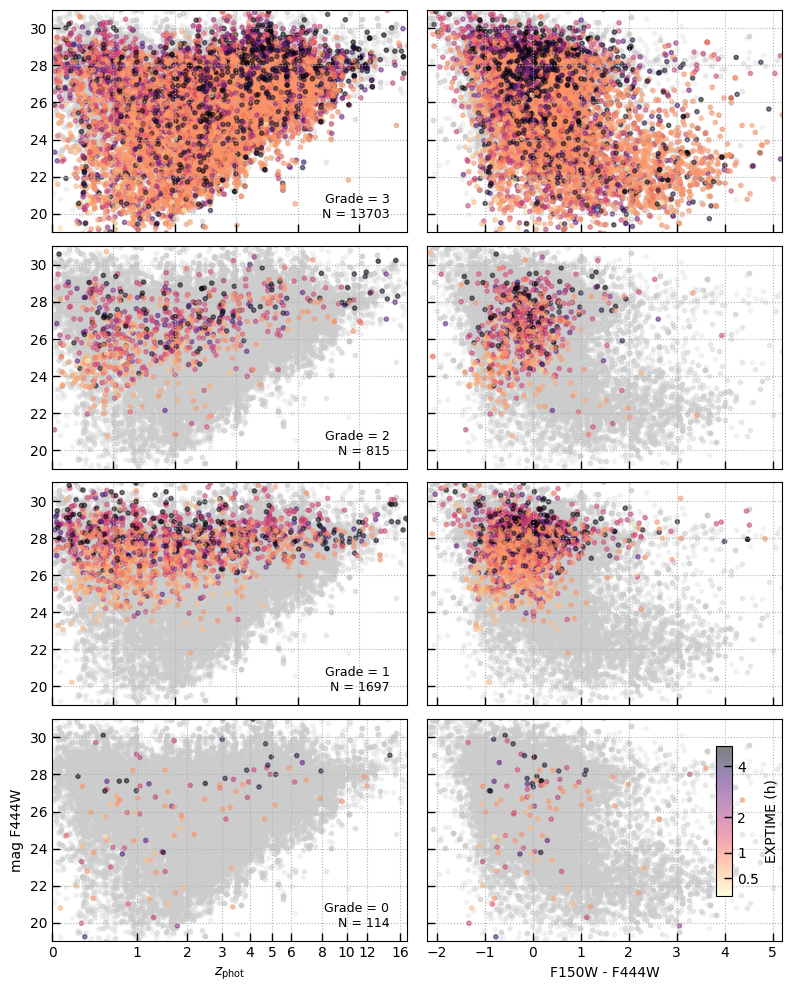

In [8]:
fig, axes = plt.subplots(4,2,figsize=(8,10), sharex=False, sharey=True)

colors = {0: 'magenta', 1: '0.5', 2: 'coral', 3: 'olive'}

# sub = is_rubies
sub = tab['ra'] > 0

sub = sub & True

sub &= tab['z_phot'].filled(-1) > 0
sub &= tab['grating'] == 'PRISM'

un = utils.Unique(tab[sub]['grade'].filled(-1))

blue = -2.5*np.log10(tab['phot_f150w_tot_1'] / tab['phot_f444w_tot_1'])

for i, c in enumerate([3,2,1,0]):

    kws = dict(
        c = np.sqrt(tab[sub][un[c]]['exptime']), vmin=900**0.5, vmax=(5*3600)**0.5, cmap='magma_r',
        # c = 'magenta',
        alpha=0.5, 
        label=f'Grade = {c}',
    )
    
    ax = axes[i][1]
    ax.scatter(blue,
               23.9 - 2.5*np.log10(tab['phot_f444w_tot_1']),
               c='0.8',
               alpha=0.2, 
               label=f'Grade = {c}',
    )

    sc = ax.scatter(blue[sub][un[c]],
               23.9 - 2.5*np.log10(tab[sub]['phot_f444w_tot_1'])[un[c]],
               **kws,
    )
    ax.grid()

    if i < 3:
        ax.set_xticklabels([])

    ax.set_xlim(-2.2, 5.2)
        
    ax = axes[i][0]
    
    ax.scatter(np.log(1+tab['z_phot']),
               23.9 - 2.5*np.log10(tab['phot_f444w_tot_1']),
               c='0.8',
               alpha=0.2, 
               label=f'Grade = {c}' + '\n' + f'N = {un[c].sum()}',
    )

    ax.scatter(np.log(1+tab[sub]['z_phot'][un[c]]),
               23.9 - 2.5*np.log10(tab[sub]['phot_f444w_tot_1'])[un[c]],
               **kws,
    )
    
    ax.grid()
    ax.text(
        0.95, 0.05,
        # f'Grade = {c}',
        f'Grade = {c}' + '\n' + f'N = {un[c].sum()}',
        ha='right', va='bottom', fontsize=9, transform=ax.transAxes)

    if i < 3:
        ax.set_xticklabels([])
    
    xt = [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 16]
    ax.set_xlim(0, np.log(1+17))

ax.set_ylabel('mag F444W')

cax = fig.add_axes

cax = fig.add_axes((0.9, 0.1, 0.02, 0.15))
cb = plt.colorbar(sc, cax=cax, orientation='vertical')
ct = [0.5, 1, 2, 4]
cb.set_ticks(np.sqrt(np.array(ct)*3600))
cb.set_ticklabels(ct)
cb.set_label('EXPTIME (h)')

ax.set_ylim(19, 31)

ax.set_xticks(np.log(1+np.array(xt)))
ax.set_xticklabels(xt)
ax.set_xlabel(r'$z_\mathrm{phot}$')

ax = axes[3][1]

ax.set_xlabel('F150W - F444W')

# ax.legend()

fig.tight_layout(pad=1)


## PRISM sample for comparision

In [9]:
is_prism = (tab['grating'] == 'PRISM')

sample = is_prism & (tab['grade'] == 3)
sample &= (tab['z_best'] < 7)
sample &= (tab['zrf'] > 0) & (tab['z_best'] > 0)
sample &= tab['rest_153_frac'] > 0.8
sample &= tab['rest_154_frac'] > 0.8
sample &= tab['rest_155_frac'] > 0.8
sample.sum()

15468

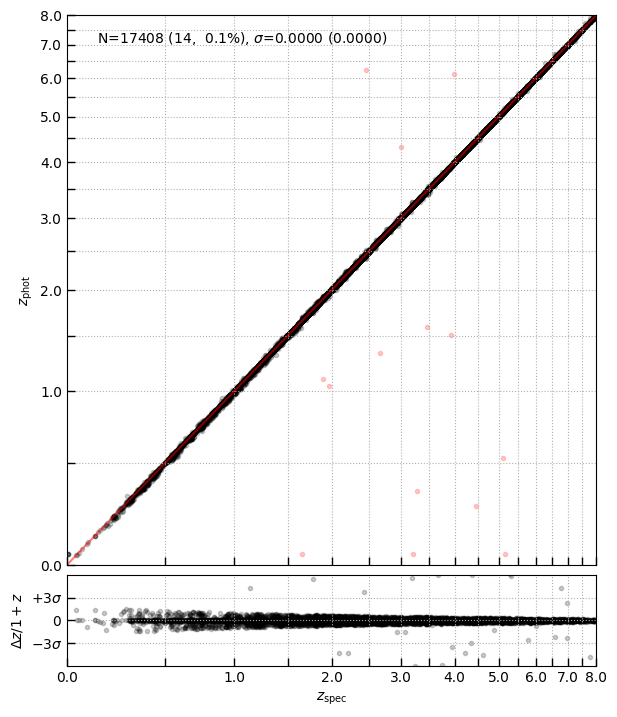

In [10]:
# Compare the redshift where the emission line fits were performed to the 
# "best" redshift calculated for discrete unique sources
_ = eazy.utils.zphot_zspec(tab['zrf'][is_prism], tab['z_best'][is_prism], zmax=8)

## Interpolate Halpha EQW from nearby filters

Use interpolated EQW


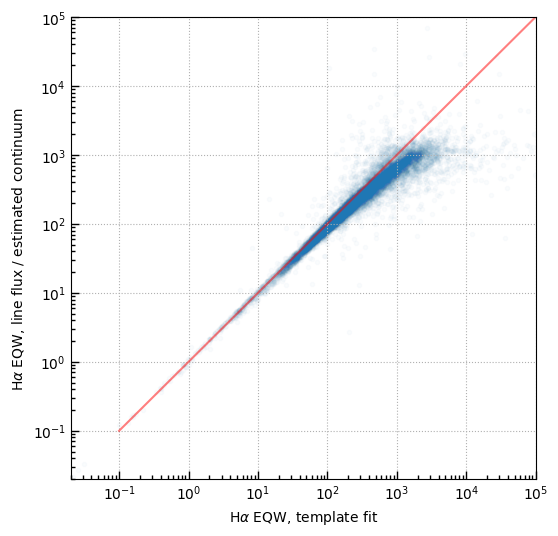

In [11]:
import eazy.filters
RES = eazy.filters.FilterFile()

fb, fr = 415, 416
#fb, fr = 155, 416
wb = RES[fb].pivot
wr = RES[fr].pivot

flamb = (1*u.microJansky).to(u.erg/u.second/u.cm**2/u.Angstrom, equivalencies=u.spectral_density(wb*u.Angstrom))
flamr = (1*u.microJansky).to(u.erg/u.second/u.cm**2/u.Angstrom, equivalencies=u.spectral_density(wr*u.Angstrom))

whtb = (1 - np.abs(wb - 6564.)/(wr-wb))# *flamb
whtr = (1 - np.abs(wr - 6564.)/(wr-wb))# *flamr

interp_flux = tab[f'rest_{fb}_flux']*whtb*flamb + tab[f'rest_{fr}_flux']*whtr*flamr

eqw = ((tab['line_ha_nii']*1.e-20*u.erg/u.second/u.cm**2 / (interp_flux / (1+tab['zline'])**1))).value

plt.scatter(
    (np.maximum(tab['eqw_ha_nii'], -100) / (1+tab['zline'])**1)[sample],
    eqw[sample], alpha=0.02
)
plt.plot([0.1, 1e7], [0.1, 1e7], color='r', alpha=0.5)
plt.loglog()
plt.grid()
plt.xlim(0.02, 1.e5); plt.ylim(0.02, 1.e5)
plt.xlabel(r'H$\alpha$ EQW, template fit')
plt.ylabel(r'H$\alpha$ EQW, line flux / estimated continuum')

if 1:
    print('Use interpolated EQW')
    eqw_lim = np.maximum(tab['line_ha_nii'], tab['line_ha_nii_err']*2) * 1.e-20*u.erg/u.second/u.cm**2 / (interp_flux / (1+tab['zline']))
    is_eqw_lim = tab['line_ha_nii_err']*2 > tab['line_ha_nii']
    eqw[is_eqw_lim] = eqw_lim.value[is_eqw_lim]
    tab['ha_eqw_with_limits'] = eqw
    tab['ha_eqw_is_limit'] = is_eqw_lim
    

## Stellar population properties

- Rest-frame colors
- Stellar masses
- ...

In [12]:
UV = -2.5*np.log10(tab['phot_restU'] / tab['phot_restV'])
VJ = -2.5*np.log10(tab['phot_restV'] / tab['phot_restJ'])

UVs = -2.5*np.log10(tab['rest_153_flux'] / tab['rest_155_flux'])
BVs = -2.5*np.log10(tab['rest_154_flux'] / tab['rest_155_flux'])
VJs = -2.5*np.log10(tab['rest_155_flux'] / tab['rest_161_flux'])

eBVs = 2.5/np.log(10) * np.sqrt(
    (tab['rest_154_full_err'] / tab['rest_154_flux'])**2
    + (tab['rest_155_full_err'] / tab['rest_155_flux'])**2
)

ugs = -2.5*np.log10(tab['rest_414_flux'] / tab['rest_415_flux'])
gis = -2.5*np.log10(tab['rest_415_flux'] / tab['rest_416_flux'])

ok_BVs = (tab['rest_154_frac'] > 0.8) & (tab['rest_155_frac'] > 0.8)
ok_gis = (tab['rest_415_frac'] > 0.8) & (tab['rest_416_frac'] > 0.8)

ok_BVs &= eBVs < 0.1

dL = WMAP9.luminosity_distance(tab['zrf']).to('cm')

rest_fV = (tab['rest_155_flux']*u.microJansky).to(
    u.erg/u.second/u.cm**2/u.Angstrom,
    equivalencies=u.spectral_density(5500.*(1+tab['zrf'])*u.Angstrom)
)

rest_fi = (tab['rest_416_flux']*u.microJansky).to(
    u.erg/u.second/u.cm**2/u.Angstrom,
    equivalencies=u.spectral_density(RES[416].pivot * (1+tab['zrf'])*u.Angstrom)
)

LV = (rest_fV * 5500. * u.Angstrom * (1 + tab['zrf']) * 4 * np.pi * dL**2).to(u.Lsun)
Li = (rest_fi * RES[416].pivot * u.Angstrom * (1 + tab['zrf']) * 4 * np.pi * dL**2).to(u.Lsun)


In [13]:
# Crude M/Lv ~ B-V from Taylor et al. 2009 for getting a quick stellar mass from the spectrum

log_MLv = -0.734 + 1.404 * (BVs + 0.084)
MassV = log_MLv + np.log10(LV.value)

tab['Mass'] = MassV
tab['Mass'].format = '.2f'
tab['ok_Mass'] = ok_BVs

plt.scatter(
    np.log10(tab['phot_mass'][sample & ok_BVs]),
    MassV[sample & ok_BVs],
    alpha=0.1,
    c=tab['phot_Av'][sample & ok_BVs]
)

plt.plot([5, 12], [5, 12], color='magenta')
plt.grid()
plt.xlim(6, 12)
plt.ylim(6, 12)
plt.xlabel('stellar mass,  eazy photometry')
plt.ylabel(r'$\log M = \log L_V + \log M/L_V$' + '\n' + r'$\log M/L_V \propto (B-V)$')

Text(0, 0.5, '$\\log M = \\log L_V + \\log M/L_V$\n$\\log M/L_V \\propto (B-V)$')

## Compare rest-frame colors

The table includes rest-frame bandpass flux densities 1) estimated from the broad-band photometry (at the photo-z) and 2) integrated directly through the spectra at the measured redshift.  

The colors derived from the  grizli/DJA *photometry* are those of the best-fit photo-z template combination, not a noisy interpolation, so they can show banding effects resulting from the discrete combination of templates.

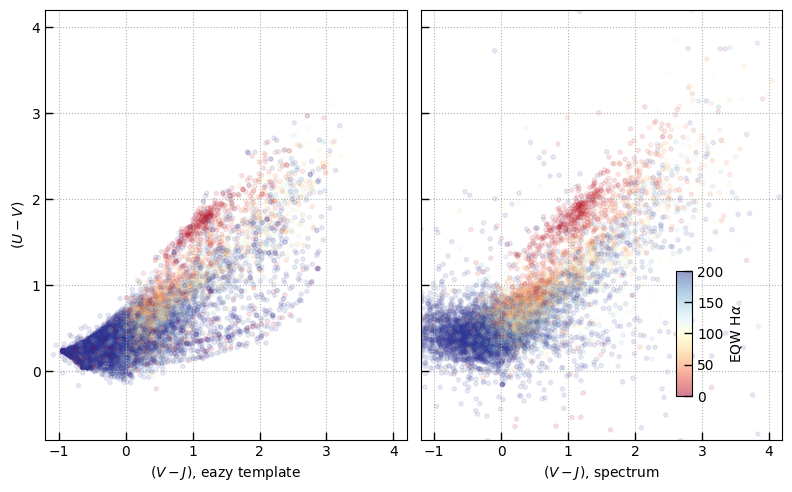

In [14]:
fig, axes = plt.subplots(1,2,figsize=(8,5), sharex=True, sharey=True)

axes[0].scatter(
    VJ[sample], UV[sample], alpha=0.1,
    c=tab['ha_eqw_with_limits'][sample], vmin=0, vmax=200, cmap='RdYlBu'
)
axes[0].set_xlabel(r'$(V-J)$' + ', eazy template')
axes[0].set_ylabel(r'$(U-V)$')

axes[1].scatter(
    VJs[sample], UVs[sample], alpha=0.1,
    c=tab['ha_eqw_with_limits'][sample], vmin=0, vmax=200, cmap='RdYlBu'
)

sc = axes[1].scatter(
    VJs[sample][:1], UVs[sample][:1], alpha=0.5,
    c=tab['ha_eqw_with_limits'][sample][:1], vmin=0, vmax=200, cmap='RdYlBu'
)

axes[1].set_xlabel(r'$(V-J)$' + ', spectrum')

for ax in axes:
    ax.set_xlim(-1.2, 4.2)
    ax.set_ylim(-0.8, 4.2)
    ax.grid()

cax = fig.add_axes((0.85, 0.2, 0.02, 0.25))
cb = plt.colorbar(sc, cax=cax, orientation='vertical')
cb.set_label(r'EQW H$\alpha$')

fig.tight_layout(pad=1)

Text(0, 0.5, 'rough stellar mass')

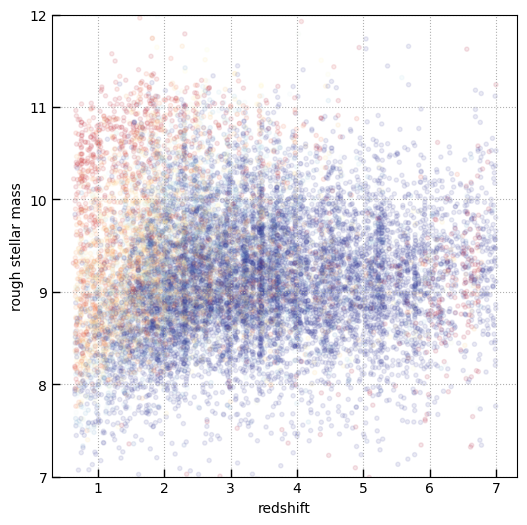

In [15]:
plt.scatter(
    tab['z_best'][sample],
    # np.log10(tab['phot_mass'])[sample],
    tab['Mass'][sample],
    alpha=0.1,
    c=tab['ha_eqw_with_limits'][sample], vmin=0, vmax=200, cmap='RdYlBu'
)
plt.ylim(7, 12)
plt.grid()
plt.xlabel('redshift')
plt.ylabel('rough stellar mass')

## Make a table showing thumbnail and spectrum previews of a selected subsample

Here make a "massive galaxies" subsample with

* `grating=PRISM` 
* ``z > 3``
* ``log M > 10.5``
* Spectrum covers rest-frame $B-V$

The preview table shows the first 32 of these, which actually tend to be quasars / LRDs where the stellar mass is likely incorrect....

In [16]:
massive = sample & (tab['z_best'] > 3.) & (MassV > 10.5) & (tab['grating'] == 'PRISM') & ok_BVs

if 0:
    tab['root','file','z_best','Mass','ha_eqw_with_limits','Thumb','Slit_Thumb','Spectrum_fnu', 'Spectrum_flam'][massive].write_sortable_html(
        '/tmp/massive.html',
        max_lines=1000,
        localhost=False,
    )
    
print(f"massive test sample: {massive.sum()}")

massive test sample: 235


In [17]:
from IPython.display import display, Markdown, Latex

so = np.argsort(tab['Mass'][massive])[::-1]
so = so[:32]

df = tab['root','file','z_best','Mass','ha_eqw_with_limits','Thumb','Slit_Thumb','Spectrum_fnu', 'Spectrum_flam'][massive][so].to_pandas()

display(Markdown(df.to_markdown()))

|    | root                   | file                                                    |   z_best |    Mass |   ha_eqw_with_limits | Thumb                                                                                                                                                                                                         | Slit_Thumb                                                                                                                                                                                                                                                  | Spectrum_fnu                                                                                                                                              | Spectrum_flam                                                                                                                                              |
|---:|:-----------------------|:--------------------------------------------------------|---------:|--------:|---------------------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | j0910-wang-v4          | j0910-wang-v4_prism-clear_2028_12910.spec.fits          |  6.62142 | 12.0515 |             54.4902  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=137.72721162%2C-4.23520691" height=200px> | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=137.72721162%2C-4.23520691&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw02028001001" height=200px> | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/j0910-wang-v4/j0910-wang-v4_prism-clear_2028_12910.fnu.png" height=200px>                   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/j0910-wang-v4/j0910-wang-v4_prism-clear_2028_12910.flam.png" height=200px>                   |
|  1 | rubies-uds23-v4        | rubies-uds23-v4_prism-clear_4233_166691.spec.fits       |  4.06673 | 11.9254 |             11.4969  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.36378034%2C-5.11191402" height=200px>  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.36378034%2C-5.11191402&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw04233002003" height=200px>  | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-uds23-v4/rubies-uds23-v4_prism-clear_4233_166691.fnu.png" height=200px>              | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-uds23-v4/rubies-uds23-v4_prism-clear_4233_166691.flam.png" height=200px>              |
|  2 | uncover-61-v4          | uncover-61-v4_prism-clear_2561_13416.spec.fits          |  4.02262 | 11.7896 |            114.235   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=3.57556471%2C-30.42438021" height=200px>  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=3.57556471%2C-30.42438021&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw02561006001" height=200px>  | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/uncover-61-v4/uncover-61-v4_prism-clear_2561_13416.fnu.png" height=200px>                   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/uncover-61-v4/uncover-61-v4_prism-clear_2561_13416.flam.png" height=200px>                   |
|  3 | jades-gdn198-v4        | jades-gdn198-v4_prism-clear_1181_68797.spec.fits        |  5.0398  | 11.7363 |           1029.12    | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=189.2291371%2C62.1461898" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=189.2291371%2C62.1461898&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw01181198001" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gdn198-v4/jades-gdn198-v4_prism-clear_1181_68797.fnu.png" height=200px>               | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gdn198-v4/jades-gdn198-v4_prism-clear_1181_68797.flam.png" height=200px>               |
|  4 | rubies-egs52-v4        | rubies-egs52-v4_prism-clear_4233_9809.spec.fits         |  5.68123 | 11.6563 |            197.61    | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=215.01729764%2C52.88015836" height=200px> | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=215.01729764%2C52.88015836&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw04233005002" height=200px> | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-egs52-v4/rubies-egs52-v4_prism-clear_4233_9809.fnu.png" height=200px>                | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-egs52-v4/rubies-egs52-v4_prism-clear_4233_9809.flam.png" height=200px>                |
|  5 | jades-gdn-v4           | jades-gdn-v4_prism-clear_1181_68797.spec.fits           |  5.0398  | 11.6303 |           1054.65    | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=189.2291371%2C62.1461898" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=189.2291371%2C62.1461898&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw01181098001" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gdn-v4/jades-gdn-v4_prism-clear_1181_68797.fnu.png" height=200px>                     | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gdn-v4/jades-gdn-v4_prism-clear_1181_68797.flam.png" height=200px>                     |
|  6 | rubies-uds22-v4        | rubies-uds22-v4_prism-clear_4233_114988.spec.fits       |  4.36474 | 11.5051 |             94.5801  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.29794136%2C-5.18436854" height=200px>  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.29794136%2C-5.18436854&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw04233002002" height=200px>  | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-uds22-v4/rubies-uds22-v4_prism-clear_4233_114988.fnu.png" height=200px>              | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-uds22-v4/rubies-uds22-v4_prism-clear_4233_114988.flam.png" height=200px>              |
|  7 | rubies-uds1-v4         | rubies-uds1-v4_prism-clear_4233_40579.spec.fits         |  3.10671 | 11.4453 |           1206.13    | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.2441997%2C-5.2458714" height=200px>    | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.2441997%2C-5.2458714&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw04233001001" height=200px>    | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-uds1-v4/rubies-uds1-v4_prism-clear_4233_40579.fnu.png" height=200px>                 | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-uds1-v4/rubies-uds1-v4_prism-clear_4233_40579.flam.png" height=200px>                 |
|  8 | gto-wide-uds13-v4      | gto-wide-uds13-v4_prism-clear_1215_1472.spec.fits       |  4.55596 | 11.4348 |             14.736   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.33731548%2C-5.1436736" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.33731548%2C-5.1436736&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw01215013001" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/gto-wide-uds13-v4/gto-wide-uds13-v4_prism-clear_1215_1472.fnu.png" height=200px>            | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/gto-wide-uds13-v4/gto-wide-uds13-v4_prism-clear_1215_1472.flam.png" height=200px>            |
|  9 | jades-gds-w05-v4       | jades-gds-w05-v4_prism-clear_1212_4582.spec.fits        |  3.06306 | 11.3624 |             79.7105  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=53.16529438%2C-27.81415679" height=200px> | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=53.16529438%2C-27.81415679&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw01212005001" height=200px> | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gds-w05-v4/jades-gds-w05-v4_prism-clear_1212_4582.fnu.png" height=200px>              | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gds-w05-v4/jades-gds-w05-v4_prism-clear_1212_4582.flam.png" height=200px>              |
| 10 | jades-gds-wide3-v4     | jades-gds-wide3-v4_prism-clear_1180_197911.spec.fits    |  3.06306 | 11.3613 |             80.9861  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=53.1653142%2C-27.8141396" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=53.1653142%2C-27.8141396&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw01180136001" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gds-wide3-v4/jades-gds-wide3-v4_prism-clear_1180_197911.fnu.png" height=200px>        | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gds-wide3-v4/jades-gds-wide3-v4_prism-clear_1180_197911.flam.png" height=200px>        |
| 11 | uncover-v4             | uncover-v4_prism-clear_2561_45924.spec.fits             |  4.4673  | 11.3522 |            104.309   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=3.58476007%2C-30.34362753" height=200px>  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=3.58476007%2C-30.34362753&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw02561002004" height=200px>  | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/uncover-v4/uncover-v4_prism-clear_2561_45924.fnu.png" height=200px>                         | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/uncover-v4/uncover-v4_prism-clear_2561_45924.flam.png" height=200px>                         |
| 12 | rubies-uds2-v4         | rubies-uds2-v4_prism-clear_4233_40579.spec.fits         |  3.10671 | 11.3515 |           1369.53    | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.2441997%2C-5.2458714" height=200px>    | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.2441997%2C-5.2458714&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw04233001002" height=200px>    | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-uds2-v4/rubies-uds2-v4_prism-clear_4233_40579.fnu.png" height=200px>                 | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-uds2-v4/rubies-uds2-v4_prism-clear_4233_40579.flam.png" height=200px>                 |
| 13 | capers-cos07-v4        | capers-cos07-v4_prism-clear_6368_105080.spec.fits       |  5.58011 | 11.3182 |            138.384   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=150.0649238%2C2.2780575" height=200px>    | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=150.0649238%2C2.2780575&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw06368007001" height=200px>    | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/capers-cos07-v4/capers-cos07-v4_prism-clear_6368_105080.fnu.png" height=200px>              | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/capers-cos07-v4/capers-cos07-v4_prism-clear_6368_105080.flam.png" height=200px>              |
| 14 | glazebrook-v4          | glazebrook-v4_prism-clear_2565_41232.spec.fits          |  3.12015 | 11.2815 |             17.5962  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.52662%2C-5.13606" height=200px>        | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.52662%2C-5.13606&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw02565300001" height=200px>        | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/glazebrook-v4/glazebrook-v4_prism-clear_2565_41232.fnu.png" height=200px>                   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/glazebrook-v4/glazebrook-v4_prism-clear_2565_41232.flam.png" height=200px>                   |
| 15 | nexus-obs3-v4          | nexus-obs3-v4_prism-clear_5105_23192.spec.fits          |  4.52105 | 11.2767 |           1058.6     | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=268.522548%2C65.2626446" height=200px>    | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=268.522548%2C65.2626446&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw05105003002" height=200px>    | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/nexus-obs3-v4/nexus-obs3-v4_prism-clear_5105_23192.fnu.png" height=200px>                   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/nexus-obs3-v4/nexus-obs3-v4_prism-clear_5105_23192.flam.png" height=200px>                   |
| 16 | capers-egs65-v4        | capers-egs65-v4_prism-clear_6368_27615.spec.fits        |  5.68123 | 11.2409 |            241.543   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=215.0172984%2C52.8801574" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=215.0172984%2C52.8801574&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw06368065001" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/capers-egs65-v4/capers-egs65-v4_prism-clear_6368_27615.fnu.png" height=200px>               | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/capers-egs65-v4/capers-egs65-v4_prism-clear_6368_27615.flam.png" height=200px>               |
| 17 | uncover-v4             | uncover-v4_prism-clear_2561_45092.spec.fits             |  3.46158 | 11.2391 |             98.5119  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=3.56691993%2C-30.34727124" height=200px>  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=3.56691993%2C-30.34727124&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw02561002005" height=200px>  | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/uncover-v4/uncover-v4_prism-clear_2561_45092.fnu.png" height=200px>                         | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/uncover-v4/uncover-v4_prism-clear_2561_45092.flam.png" height=200px>                         |
| 18 | uncover-62-v4          | uncover-62-v4_prism-clear_2561_57618.spec.fits          |  3.46158 | 11.2264 |             82.8891  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=3.5669232%2C-30.34727297" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=3.5669232%2C-30.34727297&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw02561006002" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/uncover-62-v4/uncover-62-v4_prism-clear_2561_57618.fnu.png" height=200px>                   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/uncover-62-v4/uncover-62-v4_prism-clear_2561_57618.flam.png" height=200px>                   |
| 19 | uncover-62-v4          | uncover-62-v4_prism-clear_2561_58453.spec.fits          |  4.4673  | 11.2252 |            969.994   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=3.58475839%2C-30.34362894" height=200px>  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=3.58475839%2C-30.34362894&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw02561006002" height=200px>  | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/uncover-62-v4/uncover-62-v4_prism-clear_2561_58453.fnu.png" height=200px>                   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/uncover-62-v4/uncover-62-v4_prism-clear_2561_58453.flam.png" height=200px>                   |
| 20 | gds-barrufet-s67-v4    | gds-barrufet-s67-v4_prism-clear_2198_1260.spec.fits     |  4.4319  | 11.2251 |             72.7017  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=53.07485578%2C-27.87589702" height=200px> | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=53.07485578%2C-27.87589702&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw02198003001" height=200px> | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/gds-barrufet-s67-v4/gds-barrufet-s67-v4_prism-clear_2198_1260.fnu.png" height=200px>        | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/gds-barrufet-s67-v4/gds-barrufet-s67-v4_prism-clear_2198_1260.flam.png" height=200px>        |
| 21 | glazebrook-cos-obs3-v4 | glazebrook-cos-obs3-v4_prism-clear_2565_20115.spec.fits |  3.71293 | 11.2231 |              2.61723 | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=150.06146711%2C2.37868632" height=200px>  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=150.06146711%2C2.37868632&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw02565007001" height=200px>  | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/glazebrook-cos-obs3-v4/glazebrook-cos-obs3-v4_prism-clear_2565_20115.fnu.png" height=200px> | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/glazebrook-cos-obs3-v4/glazebrook-cos-obs3-v4_prism-clear_2565_20115.flam.png" height=200px> |
| 22 | glazebrook-v4          | glazebrook-v4_prism-clear_2565_12629.spec.fits          |  3.19399 | 11.2039 |              5.4745  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.25588536%2C-5.23387142" height=200px>  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.25588536%2C-5.23387142&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw02565200001" height=200px>  | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/glazebrook-v4/glazebrook-v4_prism-clear_2565_12629.fnu.png" height=200px>                   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/glazebrook-v4/glazebrook-v4_prism-clear_2565_12629.flam.png" height=200px>                   |
| 23 | rubies-egs63-v4        | rubies-egs63-v4_prism-clear_4233_49140.spec.fits        |  6.68847 | 11.1816 |            657.49    | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.89224786%2C52.87740968" height=200px> | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.89224786%2C52.87740968&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw04233006003" height=200px> | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-egs63-v4/rubies-egs63-v4_prism-clear_4233_49140.fnu.png" height=200px>               | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-egs63-v4/rubies-egs63-v4_prism-clear_4233_49140.flam.png" height=200px>               |
| 24 | jades-gds-w08-v4       | jades-gds-w08-v4_prism-clear_1212_792.spec.fits         |  3.67516 | 11.173  |            341.192   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=53.15832903%2C-27.73360515" height=200px> | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=53.15832903%2C-27.73360515&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw01212008001" height=200px> | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gds-w08-v4/jades-gds-w08-v4_prism-clear_1212_792.fnu.png" height=200px>               | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gds-w08-v4/jades-gds-w08-v4_prism-clear_1212_792.flam.png" height=200px>               |
| 25 | rubies-uds42-v4        | rubies-uds42-v4_prism-clear_4233_807469.spec.fits       |  6.77538 | 11.1462 |           4951.05    | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.3761391%2C-5.3103658" height=200px>    | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.3761391%2C-5.3103658&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw04233004002" height=200px>    | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-uds42-v4/rubies-uds42-v4_prism-clear_4233_807469.fnu.png" height=200px>              | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-uds42-v4/rubies-uds42-v4_prism-clear_4233_807469.flam.png" height=200px>              |
| 26 | rubies-egs53-v4        | rubies-egs53-v4_prism-clear_4233_25712.spec.fits        |  3.89179 | 11.1396 |            120.361   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.86074535%2C52.7968307" height=200px>  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.86074535%2C52.7968307&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw04233005003" height=200px>  | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-egs53-v4/rubies-egs53-v4_prism-clear_4233_25712.fnu.png" height=200px>               | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-egs53-v4/rubies-egs53-v4_prism-clear_4233_25712.flam.png" height=200px>               |
| 27 | uncover-v4             | uncover-v4_prism-clear_2561_23955.spec.fits             |  3.47275 | 11.1197 |            131.122   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=3.5812724%2C-30.38022784" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=3.5812724%2C-30.38022784&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw02561002002" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/uncover-v4/uncover-v4_prism-clear_2561_23955.fnu.png" height=200px>                         | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/uncover-v4/uncover-v4_prism-clear_2561_23955.flam.png" height=200px>                         |
| 28 | goodsn-wide66-v4       | goodsn-wide66-v4_prism-clear_1211_3184.spec.fits        |  3.4402  | 11.1181 |             59.2013  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=189.3822962%2C62.28430388" height=200px>  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=189.3822962%2C62.28430388&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw01211066001" height=200px>  | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/goodsn-wide66-v4/goodsn-wide66-v4_prism-clear_1211_3184.fnu.png" height=200px>              | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/goodsn-wide66-v4/goodsn-wide66-v4_prism-clear_1211_3184.flam.png" height=200px>              |
| 29 | rubies-egs61-v4        | rubies-egs61-v4_prism-clear_4233_55604.spec.fits        |  6.98435 | 11.1174 |           2762.98    | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.98302557%2C52.9560013" height=200px>  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.98302557%2C52.9560013&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw04233006001" height=200px>  | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-egs61-v4/rubies-egs61-v4_prism-clear_4233_55604.fnu.png" height=200px>               | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-egs61-v4/rubies-egs61-v4_prism-clear_4233_55604.flam.png" height=200px>               |
| 30 | uncover-61-v4          | uncover-61-v4_prism-clear_2561_32864.spec.fits          |  3.05744 | 11.1156 |            148.446   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=3.58249928%2C-30.3854592" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=3.58249928%2C-30.3854592&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw02561006001" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/uncover-61-v4/uncover-61-v4_prism-clear_2561_32864.fnu.png" height=200px>                   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/uncover-61-v4/uncover-61-v4_prism-clear_2561_32864.flam.png" height=200px>                   |
| 31 | jades-gds-wide3-v4     | jades-gds-wide3-v4_prism-clear_1180_209777.spec.fits    |  3.70992 | 11.1048 |            244.425   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=53.1584709%2C-27.7740461" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=53.1584709%2C-27.7740461&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw01180136001" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gds-wide3-v4/jades-gds-wide3-v4_prism-clear_1180_209777.fnu.png" height=200px>        | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gds-wide3-v4/jades-gds-wide3-v4_prism-clear_1180_209777.flam.png" height=200px>        |

## Read a spectrum

The spectra can be accessed based on the ``root`` and ``file`` columns in the summary table.

![ruby](https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-egs61-v4/rubies-egs61-v4_prism-clear_4233_75646.fnu.png)

In [18]:
import msaexp.spectrum

# Set spec_file here, will be used below in NN demo
spec_file = 'rubies-egs61-v4_prism-clear_4233_75646.spec.fits'

row = tab[tab['file'] == spec_file][0]
spec = msaexp.spectrum.SpectrumSampler(FITS_URL.format(**row))

In [19]:
row['Mass']

10.873998434439217

In [20]:
spec.spec.info

<GTable length=473>
    name     dtype  unit                description                   class     n_bad
----------- ------- ---- ----------------------------------------- ------------ -----
       wave float64                                                      Column     0
       flux float64                                                      Column     0
        err float64                                                      Column     0
        sky float64  uJy                                           MaskedColumn     5
  path_corr float64                                                MaskedColumn     5
       npix float64                                                      Column     0
   flux_sum float64                                                      Column     0
profile_sum float64                                                      Column     0
    var_sum float64                                                      Column     0
       corr float64               

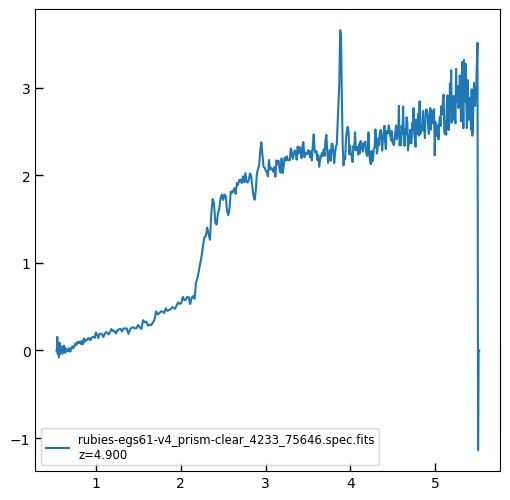

In [21]:
plt.plot(spec['wave'], spec['flux'],
         label="{file}\nz={z_best:.3f}".format(**row))
plt.legend()

# All `msaexp` PRISM spectra in a single table

All of the 1D extracted spectra have been collated into single FITS tables.

In [22]:
combined_spectra_file = f"dja_msaexp_emission_lines_{version}.prism_spectra.fits"

if os.path.exists(combined_spectra_file):
    prism_spectra = utils.read_catalog(combined_spectra_file)
else:
    # Combined prism spectra in a single big table (595 Mb)
    prism_spectra = utils.read_catalog(
        download_file(
            f"{URL_PREFIX}/{combined_spectra_file}",
            cache=CACHE_DOWNLOADS
        ),
        format='fits',
    )

In [23]:
prism_spectra.info()

<GTable length=473>
   name    dtype   shape      class     n_bad 
--------- ------- -------- ------------ ------
     wave float64                Column      0
     flux float64 (34949,)       Column      0
      err float64 (34949,)       Column      0
      sky float64 (34949,) MaskedColumn 697133
path_corr float64 (34949,) MaskedColumn 697133
     npix   int64 (34949,)       Column      0
 full_err float64 (34949,)       Column      0
    valid    bool (34949,)       Column      0


In [24]:
# The columns of the spectrum have N entries for N objects with a particular grating
# and are aligned with the summary table for that grating

is_prism = tab['grating'] == 'PRISM'
tab['prism_idx'] = 0
tab['prism_idx'][is_prism] = np.arange(is_prism.sum())

print(f"""
File: {combined_spectra_file}\n
{prism_spectra['flux'].shape[0]} wavelength bins\n
PRISM spectra in the merged catalog: {is_prism.sum()}
PRISM spectra in the combined table: {prism_spectra['flux'].shape}
""")


File: dja_msaexp_emission_lines_v4.4.prism_spectra.fits

473 wavelength bins

PRISM spectra in the merged catalog: 34949
PRISM spectra in the combined table: (473, 34949)



In [25]:
# Subset of "valid" spectra defined at most wavelengths
valid_count = prism_spectra['valid'].sum(axis=0)
valid_spec = valid_count > (valid_count.max() - 64)
valid_spec.sum()

31720

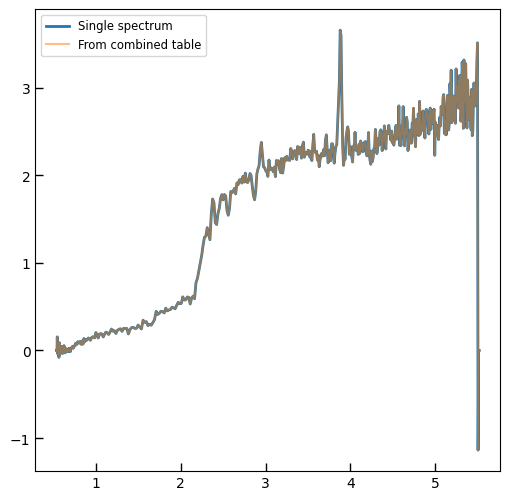

In [26]:
row_idx = np.where(tab['file'] == spec_file)[0][0]
row = tab[row_idx]

plt.plot(
    spec['wave'], spec['flux'],
    lw=2, label='Single spectrum'
)

plt.plot(
    prism_spectra['wave'], prism_spectra['flux'][:, row['prism_idx']],
    alpha=0.5, label='From combined table'
)

plt.legend()

## "Stacked" spectrum

Stacking prism spectra isn't trivial due to the variable dispersion and wavelength sampling.  Here just plot a subset on top of each other.

Normalization column: 'rest_416_flux' = Spectrum flux in synthetic_i


(-1.0, 10.0)

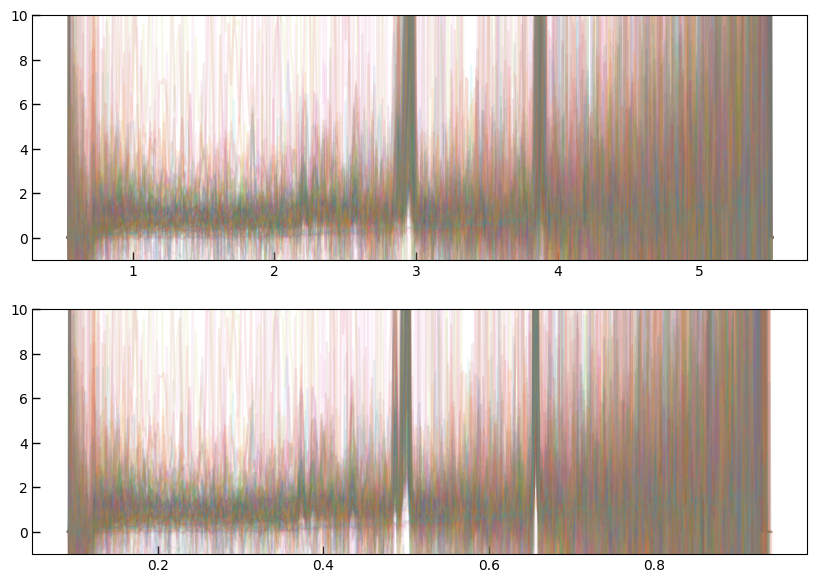

In [27]:
norm_column = 'rest_416_flux'
print(f"Normalization column: '{norm_column}' = {tab[norm_column].description}")

flux_norm = prism_spectra['flux'] / tab[norm_column][is_prism]

# Subset
zi = row['z_best']
dz = 0.05

sample = (tab['z_best'] > zi - dz) & (tab['z_best'] < zi + dz)

sub_sample = sample[is_prism] & valid_spec
sub_idx = np.where(sub_sample)[0]

z_sample = tab['z_best'][is_prism][sample[is_prism] & valid_spec]

fig, axes = plt.subplots(2,1,figsize=(10,7), sharex=False, sharey=True)

for j, z in enumerate(z_sample):
    axes[0].plot(
        prism_spectra['wave'],
        flux_norm[:, sub_idx[j]],
        alpha=0.1
    )
    
    axes[1].plot(
        prism_spectra['wave'] / (1 + z),
        flux_norm[:, sub_idx[j]],
        alpha=0.1
    )

axes[0].set_ylim(-1, 10)

# "Nearest neighbor" spectra

Simple "nearest neighbors" of the observed-frame normalized spectra extracted from a [KDTree](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html).

In [28]:
fix_flux_norm = flux_norm*1.
fix_flux_norm[~np.isfinite(flux_norm)] = 0

tr = cKDTree(fix_flux_norm[:, valid_spec].T)

N_nn = 32

row = tab[tab['file'] == spec_file][0]

# Features matrix is full normalized observed-frame spectra
Xfeatures = fix_flux_norm

tr_ds, tr_idx = tr.query(Xfeatures[:, row['prism_idx']], k=N_nn)

display_columns = [
    'root','file','zrf','Mass','ha_eqw_with_limits','Thumb','Slit_Thumb','Spectrum_fnu', 'Spectrum_flam'
]

df = tab[display_columns][is_prism][valid_spec][tr_idx][:16].to_pandas()

display(Markdown(df.to_markdown()))

|    | root                   | file                                                    |     zrf |    Mass |   ha_eqw_with_limits | Thumb                                                                                                                                                                                                         | Slit_Thumb                                                                                                                                                                                                                                                  | Spectrum_fnu                                                                                                                                              | Spectrum_flam                                                                                                                                              |
|---:|:-----------------------|:--------------------------------------------------------|--------:|--------:|---------------------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | rubies-egs61-v4        | rubies-egs61-v4_prism-clear_4233_75646.spec.fits        | 4.90238 | 10.874  |             24.3336  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.91554591%2C52.94901831" height=200px> | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.91554591%2C52.94901831&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw04233006001" height=200px> | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-egs61-v4/rubies-egs61-v4_prism-clear_4233_75646.fnu.png" height=200px>               | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-egs61-v4/rubies-egs61-v4_prism-clear_4233_75646.flam.png" height=200px>               |
|  1 | gds-barrufet-s67-v4    | gds-barrufet-s67-v4_prism-clear_2198_8777.spec.fits     | 4.65301 | 10.6769 |              8.26113 | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=53.10820397%2C-27.82518775" height=200px> | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=53.10820397%2C-27.82518775&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw02198003001" height=200px> | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/gds-barrufet-s67-v4/gds-barrufet-s67-v4_prism-clear_2198_8777.fnu.png" height=200px>        | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/gds-barrufet-s67-v4/gds-barrufet-s67-v4_prism-clear_2198_8777.flam.png" height=200px>        |
|  2 | gds-barrufet-s67-v4    | gds-barrufet-s67-v4_prism-clear_2198_8290.spec.fits     | 4.34034 | 10.5556 |              4.0581  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=53.08187859%2C-27.82879899" height=200px> | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=53.08187859%2C-27.82879899&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw02198003001" height=200px> | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/gds-barrufet-s67-v4/gds-barrufet-s67-v4_prism-clear_2198_8290.fnu.png" height=200px>        | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/gds-barrufet-s67-v4/gds-barrufet-s67-v4_prism-clear_2198_8290.flam.png" height=200px>        |
|  3 | mom-uds02-v4           | mom-uds02-v4_prism-clear_5224_144670.spec.fits          | 3.97196 | 10.6169 |             14.667   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.24259288%2C-5.14312088" height=200px>  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.24259288%2C-5.14312088&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw05224002001" height=200px>  | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/mom-uds02-v4/mom-uds02-v4_prism-clear_5224_144670.fnu.png" height=200px>                    | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/mom-uds02-v4/mom-uds02-v4_prism-clear_5224_144670.flam.png" height=200px>                    |
|  4 | jades-gdn09-v4         | jades-gdn09-v4_prism-clear_1181_72127.spec.fits         | 4.13556 | 10.5771 |             75.7974  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=189.2657184%2C62.1683933" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=189.2657184%2C62.1683933&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw01181009001" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gdn09-v4/jades-gdn09-v4_prism-clear_1181_72127.fnu.png" height=200px>                 | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gdn09-v4/jades-gdn09-v4_prism-clear_1181_72127.flam.png" height=200px>                 |
|  5 | glazebrook-cos-obs1-v4 | glazebrook-cos-obs1-v4_prism-clear_2565_10559.spec.fits | 4.28971 | 10.5518 |              3.80496 | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=150.07143593%2C2.29117893" height=200px>  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=150.07143593%2C2.29117893&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw02565301001" height=200px>  | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/glazebrook-cos-obs1-v4/glazebrook-cos-obs1-v4_prism-clear_2565_10559.fnu.png" height=200px> | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/glazebrook-cos-obs1-v4/glazebrook-cos-obs1-v4_prism-clear_2565_10559.flam.png" height=200px> |
|  6 | jades-gds-wide-v4      | jades-gds-wide-v4_prism-clear_1180_12619.spec.fits      | 3.60465 | 10.6324 |             27.8163  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=53.1969096%2C-27.7605277" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=53.1969096%2C-27.7605277&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw01180029001" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gds-wide-v4/jades-gds-wide-v4_prism-clear_1180_12619.fnu.png" height=200px>           | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gds-wide-v4/jades-gds-wide-v4_prism-clear_1180_12619.flam.png" height=200px>           |
|  7 | rubies-uds2-v4         | rubies-uds2-v4_prism-clear_b28.spec.fits                | 4.39429 | 10.8802 |              5.61715 | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.2805153%2C-5.21721404" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.2805153%2C-5.21721404&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw04233001002" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-uds2-v4/rubies-uds2-v4_prism-clear_b28.fnu.png" height=200px>                        | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-uds2-v4/rubies-uds2-v4_prism-clear_b28.flam.png" height=200px>                        |
|  8 | rubies-uds2-v4         | rubies-uds2-v4_prism-clear_4233_b28.spec.fits           | 4.39461 | 10.8801 |              5.59215 | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.2805153%2C-5.21721404" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.2805153%2C-5.21721404&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw04233001002" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-uds2-v4/rubies-uds2-v4_prism-clear_4233_b28.fnu.png" height=200px>                   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-uds2-v4/rubies-uds2-v4_prism-clear_4233_b28.flam.png" height=200px>                   |
|  9 | glazebrook-cos-obs3-v4 | glazebrook-cos-obs3-v4_prism-clear_2565_20115.spec.fits | 3.72605 | 11.2231 |              2.61723 | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=150.06146711%2C2.37868632" height=200px>  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=150.06146711%2C2.37868632&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw02565007001" height=200px>  | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/glazebrook-cos-obs3-v4/glazebrook-cos-obs3-v4_prism-clear_2565_20115.fnu.png" height=200px> | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/glazebrook-cos-obs3-v4/glazebrook-cos-obs3-v4_prism-clear_2565_20115.flam.png" height=200px> |
| 10 | gto-wide-egs1-v4       | gto-wide-egs1-v4_prism-clear_1213_4358.spec.fits        | 4.29302 | 10.6918 |             21.9825  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=215.03907944%2C53.0027735" height=200px>  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=215.03907944%2C53.0027735&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw01213002001" height=200px>  | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/gto-wide-egs1-v4/gto-wide-egs1-v4_prism-clear_1213_4358.fnu.png" height=200px>              | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/gto-wide-egs1-v4/gto-wide-egs1-v4_prism-clear_1213_4358.flam.png" height=200px>              |
| 11 | jades-gdn09-v4         | jades-gdn09-v4_prism-clear_1181_80660.spec.fits         | 4.40673 | 10.2177 |             25.751   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=189.2754487%2C62.2141353" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=189.2754487%2C62.2141353&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw01181009001" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gdn09-v4/jades-gdn09-v4_prism-clear_1181_80660.fnu.png" height=200px>                 | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gdn09-v4/jades-gdn09-v4_prism-clear_1181_80660.flam.png" height=200px>                 |
| 12 | glazebrook-v4          | glazebrook-v4_prism-clear_2565_10459.spec.fits          | 3.97084 | 10.6829 |              4.65304 | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.34034528%2C-5.24130895" height=200px>  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.34034528%2C-5.24130895&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw02565100001" height=200px>  | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/glazebrook-v4/glazebrook-v4_prism-clear_2565_10459.fnu.png" height=200px>                   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/glazebrook-v4/glazebrook-v4_prism-clear_2565_10459.flam.png" height=200px>                   |
| 13 | jades-gdn198-v4        | jades-gdn198-v4_prism-clear_1181_76320.spec.fits        | 3.24558 | 10.306  |              5.3213  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=189.2214567%2C62.1924022" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=189.2214567%2C62.1924022&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw01181198001" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gdn198-v4/jades-gdn198-v4_prism-clear_1181_76320.fnu.png" height=200px>               | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gdn198-v4/jades-gdn198-v4_prism-clear_1181_76320.flam.png" height=200px>               |
| 14 | macs1149-v4            | macs1149-v4_prism-clear_1208_5103925.spec.fits          | 3.69631 | 10.8235 |              6.45299 | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=177.38919232%2C22.36724586" height=200px> | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=177.38919232%2C22.36724586&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw01208049001" height=200px> | <img src="https://s3.amazonaws.com/grizli-canucs/nirspec/macs1149-v4/macs1149-v4_prism-clear_1208_5103925.fnu.png" height=200px>                          | <img src="https://s3.amazonaws.com/grizli-canucs/nirspec/macs1149-v4/macs1149-v4_prism-clear_1208_5103925.flam.png" height=200px>                          |
| 15 | jades-gdn-v4           | jades-gdn-v4_prism-clear_1181_76320.spec.fits           | 3.23434 | 10.3316 |              4.69578 | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=189.2214567%2C62.1924022" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=189.2214567%2C62.1924022&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw01181098001" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gdn-v4/jades-gdn-v4_prism-clear_1181_76320.fnu.png" height=200px>                     | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gdn-v4/jades-gdn-v4_prism-clear_1181_76320.flam.png" height=200px>                     |

## Compute NN in rest-frame

The example above computed "raw" nearest neighbors from the full observed-frame spectra.  To compute NN in the rest-frame, interpolate spectra to a fixed rest-frame wavelength grid.

In [29]:
from tqdm import tqdm

# rest-frame interpolated
wrest = utils.log_zgrid([0.08, 1.4], 1./1200/np.log(10))
wrest = np.unique([prism_spectra['wave'] / (1+z) for z in utils.log_zgrid([0.5, 7], 0.3)])
print(wrest.shape)

zero = wrest*0.

rest_flux_norm = []
for i, z in tqdm(enumerate(tab['zrf'][is_prism])):
    if z < 0:
        rest_flux_norm.append(zero)
    else:
        rest_flux_norm.append(np.interp(wrest, prism_spectra['wave'] / (1 + z), flux_norm[:,i], left=0, right=0))

rest_flux_norm = np.array(rest_flux_norm).T
rest_flux_norm[~np.isfinite(rest_flux_norm)] = 0

(2838,)


34949it [00:02, 14248.53it/s]


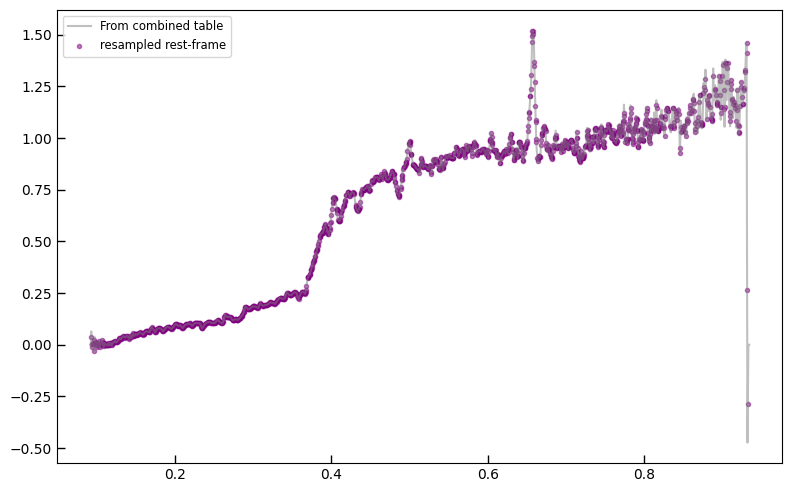

In [30]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(
    prism_spectra['wave'] / (1 + tab['zrf'][row_idx]), flux_norm[:, row['prism_idx']],
    alpha=0.5, label='From combined table',
    color='0.5',
)

valid_rest = rest_flux_norm[:, row['prism_idx']] != 0
ax.scatter(
    wrest[valid_rest],
    rest_flux_norm[:, row['prism_idx']][valid_rest],
    marker='.',
    color='purple',
    label='resampled rest-frame',
    alpha=0.5
)

ax.legend()

fig.tight_layout(pad=1)


In [31]:
# Compute nearest-neighbors over limited rest-frame wavelength range
sli = np.where((wrest > 0.2) & (wrest < 0.8))[0]

Xfeatures = rest_flux_norm[sli,:]
tr = cKDTree(Xfeatures[:, valid_spec].T)


In [32]:
if False:
    # Trimmed spectrum and include log(1+z) as a feature
    sli = slice(32, -16)
    
    fix_flux_norm = np.vstack([flux_norm[sli,:]**1, np.log(1+tab['zrf'][is_prism]) * 1e-2]) 
    fix_flux_norm[~np.isfinite(fix_flux_norm)] = 0
    
    Xfeatures = fix_flux_norm
    tr = cKDTree(Xfeatures[:, valid_spec].T)


In [33]:
row = tab[tab['file'] == spec_file][0]

tr_ds, tr_idx = tr.query(Xfeatures[:, row['prism_idx']], k=N_nn)

df = tab[display_columns][is_prism][valid_spec][tr_idx][:16].to_pandas()

display(Markdown(df.to_markdown()))


|    | root              | file                                               |     zrf |    Mass |   ha_eqw_with_limits | Thumb                                                                                                                                                                                                         | Slit_Thumb                                                                                                                                                                                                                                                  | Spectrum_fnu                                                                                                                                    | Spectrum_flam                                                                                                                                    |
|---:|:------------------|:---------------------------------------------------|--------:|--------:|---------------------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | rubies-egs61-v4   | rubies-egs61-v4_prism-clear_4233_75646.spec.fits   | 4.90238 | 10.874  |             24.3336  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.91554591%2C52.94901831" height=200px> | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.91554591%2C52.94901831&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw04233006001" height=200px> | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-egs61-v4/rubies-egs61-v4_prism-clear_4233_75646.fnu.png" height=200px>     | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-egs61-v4/rubies-egs61-v4_prism-clear_4233_75646.flam.png" height=200px>     |
|  1 | ceers-v4          | ceers-v4_prism-clear_1345_2759.spec.fits           | 3.43971 | 10.622  |             31.5176  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.8712313%2C52.8450664" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.8712313%2C52.8450664&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw01345062001" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/ceers-v4/ceers-v4_prism-clear_1345_2759.fnu.png" height=200px>                    | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/ceers-v4/ceers-v4_prism-clear_1345_2759.flam.png" height=200px>                    |
|  2 | capers-cos16-v4   | capers-cos16-v4_prism-clear_6368_24202.spec.fits   | 3.09955 | 10.9213 |             20.8004  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=150.209022%2C2.3491367" height=200px>     | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=150.209022%2C2.3491367&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw06368016001" height=200px>     | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/capers-cos16-v4/capers-cos16-v4_prism-clear_6368_24202.fnu.png" height=200px>     | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/capers-cos16-v4/capers-cos16-v4_prism-clear_6368_24202.flam.png" height=200px>     |
|  3 | mom-uds02-v4      | mom-uds02-v4_prism-clear_5224_144670.spec.fits     | 3.97196 | 10.6169 |             14.667   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.24259288%2C-5.14312088" height=200px>  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=34.24259288%2C-5.14312088&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw05224002001" height=200px>  | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/mom-uds02-v4/mom-uds02-v4_prism-clear_5224_144670.fnu.png" height=200px>          | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/mom-uds02-v4/mom-uds02-v4_prism-clear_5224_144670.flam.png" height=200px>          |
|  4 | nexus-obs5-v4     | nexus-obs5-v4_prism-clear_5105_27813.spec.fits     | 3.96582 | 11.0988 |              8.80705 | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=268.3694914%2C65.1623794" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=268.3694914%2C65.1623794&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw05105005001" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/nexus-obs5-v4/nexus-obs5-v4_prism-clear_5105_27813.fnu.png" height=200px>         | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/nexus-obs5-v4/nexus-obs5-v4_prism-clear_5105_27813.flam.png" height=200px>         |
|  5 | jades-gds05-v4    | jades-gds05-v4_prism-clear_1286_194373.spec.fits   | 2.67694 | 10.2399 |             42.391   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=53.1400619%2C-27.8265143" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=53.1400619%2C-27.8265143&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw01286005001" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gds05-v4/jades-gds05-v4_prism-clear_1286_194373.fnu.png" height=200px>      | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gds05-v4/jades-gds05-v4_prism-clear_1286_194373.flam.png" height=200px>      |
|  6 | ceers-ddt-v4      | ceers-ddt-v4_prism-clear_2750_307.spec.fits        | 2.93255 | 10.9374 |              2.72842 | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.9110463%2C52.9331179" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.9110463%2C52.9331179&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw02750002001" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/ceers-ddt-v4/ceers-ddt-v4_prism-clear_2750_307.fnu.png" height=200px>             | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/ceers-ddt-v4/ceers-ddt-v4_prism-clear_2750_307.flam.png" height=200px>             |
|  7 | glazebrook-egs-v4 | glazebrook-egs-v4_prism-clear_2565_18996.spec.fits | 3.23542 | 10.9906 |             23.3237  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.8956147%2C52.85649932" height=200px>  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.8956147%2C52.85649932&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw02565006001" height=200px>  | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/glazebrook-egs-v4/glazebrook-egs-v4_prism-clear_2565_18996.fnu.png" height=200px> | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/glazebrook-egs-v4/glazebrook-egs-v4_prism-clear_2565_18996.flam.png" height=200px> |
|  8 | capers-egs49-v4   | capers-egs49-v4_prism-clear_6368_7806.spec.fits    | 3.45255 | 10.285  |             33.2528  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.8790898%2C52.8880604" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.8790898%2C52.8880604&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw06368049001" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/capers-egs49-v4/capers-egs49-v4_prism-clear_6368_7806.fnu.png" height=200px>      | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/capers-egs49-v4/capers-egs49-v4_prism-clear_6368_7806.flam.png" height=200px>      |
|  9 | ceers-v4          | ceers-v4_prism-clear_1345_2779.spec.fits           | 3.23845 | 10.8818 |             31.1324  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.895621%2C52.8564964" height=200px>    | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.895621%2C52.8564964&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw01345100001" height=200px>    | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/ceers-v4/ceers-v4_prism-clear_1345_2779.fnu.png" height=200px>                    | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/ceers-v4/ceers-v4_prism-clear_1345_2779.flam.png" height=200px>                    |
| 10 | snh0pe-v4         | snh0pe-v4_prism-clear_4446_274.spec.fits           | 4.11111 | 10.8132 |              4.80224 | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=171.82361288%2C42.46963868" height=200px> | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=171.82361288%2C42.46963868&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw04446001001" height=200px> | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/snh0pe-v4/snh0pe-v4_prism-clear_4446_274.fnu.png" height=200px>                   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/snh0pe-v4/snh0pe-v4_prism-clear_4446_274.flam.png" height=200px>                   |
| 11 | egs-nelsonx-v4    | egs-nelsonx-v4_prism-clear_4106_76085.spec.fits    | 3.22192 | 10.5733 |             34.906   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.83684409%2C52.8734566" height=200px>  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.83684409%2C52.8734566&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw04106006001" height=200px>  | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/egs-nelsonx-v4/egs-nelsonx-v4_prism-clear_4106_76085.fnu.png" height=200px>       | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/egs-nelsonx-v4/egs-nelsonx-v4_prism-clear_4106_76085.flam.png" height=200px>       |
| 12 | rubies-egs63-v4   | rubies-egs63-v4_prism-clear_4233_58841.spec.fits   | 3.45082 | 10.4517 |             27.5816  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.87909774%2C52.8880646" height=200px>  | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.87909774%2C52.8880646&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw04233006003" height=200px>  | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-egs63-v4/rubies-egs63-v4_prism-clear_4233_58841.fnu.png" height=200px>     | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-egs63-v4/rubies-egs63-v4_prism-clear_4233_58841.flam.png" height=200px>     |
| 13 | rubies-egs63-v4   | rubies-egs63-v4_prism-clear_4233_61168.spec.fits   | 3.43539 | 10.8289 |              3.56196 | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.86605335%2C52.88425718" height=200px> | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.86605335%2C52.88425718&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw04233006003" height=200px> | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-egs63-v4/rubies-egs63-v4_prism-clear_4233_61168.fnu.png" height=200px>     | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/rubies-egs63-v4/rubies-egs63-v4_prism-clear_4233_61168.flam.png" height=200px>     |
| 14 | glazebrook-egs-v4 | glazebrook-egs-v4_prism-clear_2565_31322.spec.fits | 3.4242  | 10.961  |              3.01521 | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.86605432%2C52.88425639" height=200px> | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.86605432%2C52.88425639&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw02565006001" height=200px> | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/glazebrook-egs-v4/glazebrook-egs-v4_prism-clear_2565_31322.fnu.png" height=200px> | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/glazebrook-egs-v4/glazebrook-egs-v4_prism-clear_2565_31322.flam.png" height=200px> |
| 15 | jades-gds03-v4    | jades-gds03-v4_prism-clear_1286_10026167.spec.fits | 3.50452 | 10.3615 |              2.95476 | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=53.0825811%2C-27.8668027" height=200px>   | <img src="https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=53.0825811%2C-27.8668027&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw01286003001" height=200px>   | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gds03-v4/jades-gds03-v4_prism-clear_1286_10026167.fnu.png" height=200px>    | <img src="https://s3.amazonaws.com/msaexp-nirspec/extractions/jades-gds03-v4/jades-gds03-v4_prism-clear_1286_10026167.flam.png" height=200px>    |

32


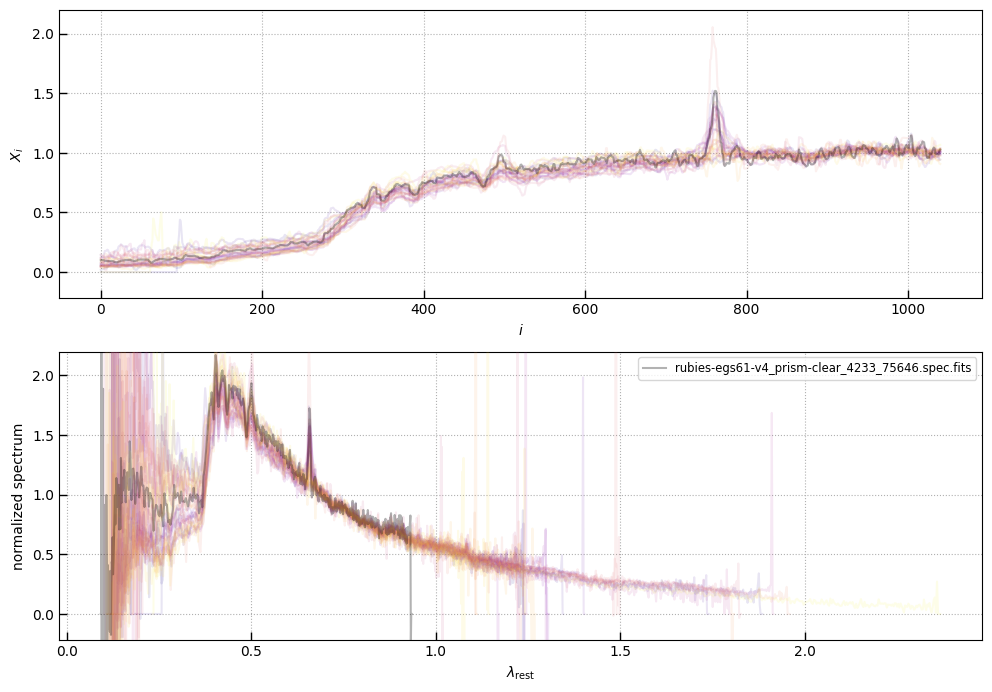

In [34]:
nn_sample = tab['ra'] < 0
nn_j = np.where(is_prism)[0][valid_spec][tr_idx]

nn_sample[nn_j] = True
print(nn_sample.sum())
sub_sample = nn_sample[is_prism] & valid_spec
sub_idx = np.where(sub_sample)[0]

z_sample = tab['zrf'][is_prism][nn_sample[is_prism] & valid_spec]
file_sample = tab['file'][is_prism][nn_sample[is_prism] & valid_spec]

fig, axes = plt.subplots(2,1,figsize=(10,7), sharex=False, sharey=True)

flam = -2
if 0:
    flam = 0

for j, z in enumerate(z_sample):
    kws = dict(
        alpha=0.3 if file_sample[j] == spec_file else 0.1,
        color='k' if file_sample[j] == spec_file else plt.cm.plasma(j/len(z_sample)),
        label=spec_file if file_sample[j] == spec_file else None,
        zorder=1000 if file_sample[j] == spec_file else 10,
    )
    
    axes[0].plot(
        # prism_spectra['wave'],
        # (flux_norm[:, sub_idx[j]] * (prism_spectra['wave'] / (1 + z) / 0.7)**flam),
        (Xfeatures[:, sub_idx[j]]), # * (prism_spectra['wave'] / (1 + z) / 0.7)**flam),
        **kws
    )
    
    axes[1].plot(
        prism_spectra['wave'] / (1 + z),
        (flux_norm[:, sub_idx[j]] * (prism_spectra['wave'] / (1 + z) / 0.7)**flam),
        **kws
    )

axes[0].set_xlabel(r'$i$')
axes[0].set_ylabel(r'$X_i$')

ymax = 2.2
axes[1].legend(loc='upper right')
axes[1].set_xlabel(r'$\lambda_\mathrm{rest}$')
axes[1].set_ylabel('normalized spectrum')

axes[0].set_ylim(-0.1*ymax, ymax)
for ax in axes:
    ax.grid()
    
fig.tight_layout(pad=1)

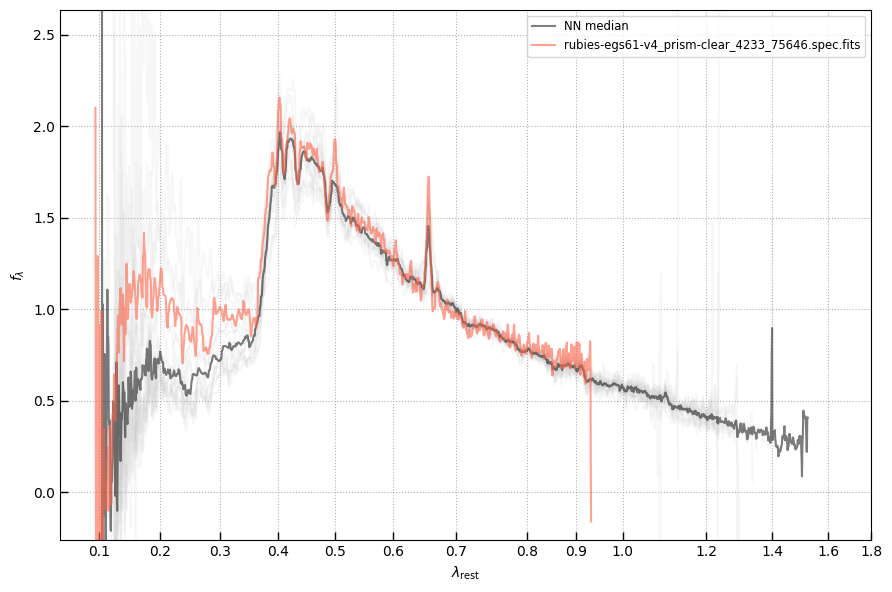

In [35]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
tr_spec = (rest_flux_norm[:, valid_spec][:,tr_idx].T * (wrest/0.7)**flam).T
tr_spec[np.abs(tr_spec) < 1.e-6] = np.nan
tr_spec = tr_spec[:,:16]

xpl = wrest
xpl = np.arange(len(xpl))

_ = ax.plot(xpl, tr_spec[:,1:], alpha=0.1, color='0.7')

# _ = ax.plot(wrest, np.nanmean(tr_spec, axis=1), alpha=0.5, color='k')
_ = ax.plot(xpl, np.nanmedian(tr_spec[:,1:], axis=1), alpha=0.5, color='k', label='NN median')

src_spec = tr_spec[:,0] #np.nanmean((rest_flux_norm[:, valid_spec][sli,:][:,tr_idx[:1]].T * (wrest[sli]/0.7)**flam).T, axis=1)

_ = ax.plot(xpl, src_spec, alpha=0.6, color='tomato', label=spec_file)

ymax = 1.5*np.nanpercentile(src_spec, 90)

xt = np.append(np.arange(0.1, 1.01, 0.1), np.arange(1.2, 1.81, 0.2))
ax.set_xticks(np.interp(xt, wrest, xpl))
ax.set_xticklabels([f'{v:.1f}' for v in xt])

# ax.set_xlim(*np.interp([0.3, 1.9], wrest, xpl))

ax.legend(loc='upper right')

ax.set_ylim(-0.1*ymax, ymax)
ax.grid()
# ax.semilogx()
ax.set_ylabel(r'$f_\lambda$')
ax.set_xlabel(r'$\lambda_\mathrm{rest}$')
fig.tight_layout(pad=1)


# Merged 1D grating spectra

Read 1D grating arrays

In [36]:
try:
    _ = grating_spectra
except NameError:
    # Initialize
    grating_spectra = {}

for (grating, filter) in [('G140M', 'F070LP'), ('G235M','F170LP'), ('G395M', 'F290LP')]: 
    key = (grating, filter)
    
    grating_spectra_file = f"dja_msaexp_emission_lines_{version}.{grating}-{filter}_spectra.fits".lower()
    
    if key not in grating_spectra:
        print(f"{key}: load {grating_spectra_file}")
        
        if os.path.exists(grating_spectra_file):
            grating_spectra[key] = utils.read_catalog(grating_spectra_file)
        else:
            # Combined grating spectra in a single big table
            grating_spectra[key] = utils.read_catalog(
                download_file(
                    f"{URL_PREFIX}/{grating_spectra_file}",
                    cache=CACHE_DOWNLOADS
                ),
                format='fits',
            )
        
    else:
        print(f"{key} spectra already loaded from {grating_spectra_file}")

    is_grating = (tab["grating"] == grating) & (tab["filter"] == filter)

    print(f"""
    {grating_spectra[key]["flux"].shape[0]} wavelength bins\n
    {grating} {filter} spectra in the combined table: {grating_spectra[key]["flux"].shape}
    {grating} {filter} entries in the summary table:  {is_grating.sum()}
""")


('G140M', 'F070LP'): load dja_msaexp_emission_lines_v4.4.g140m-f070lp_spectra.fits

    4667 wavelength bins

    G140M F070LP spectra in the combined table: (4667, 5851)
    G140M F070LP entries in the summary table:  5851

('G235M', 'F170LP'): load dja_msaexp_emission_lines_v4.4.g235m-f170lp_spectra.fits

    3685 wavelength bins

    G235M F170LP spectra in the combined table: (3685, 8000)
    G235M F170LP entries in the summary table:  8000

('G395M', 'F290LP'): load dja_msaexp_emission_lines_v4.4.g395m-f290lp_spectra.fits

    1661 wavelength bins

    G395M F290LP spectra in the combined table: (1661, 13606)
    G395M F290LP entries in the summary table:  13606



## NN with grating spectra

Look for grating spectra of sources identified as nearest-neighbors above, matching on the ``obsid`` unique identifier.

In [37]:
nn_objid = tab['objid'][is_prism][valid_spec][tr_idx]
# gratings = np.unique(tab['grating'])
match_objid = np.isin(tab['objid'], nn_objid) & (tab['line_ha_err'] > 0)
_ = utils.Unique(tab['grating'][match_objid])
_ = utils.Unique(tab['filter'][match_objid])

   N  value     
====  ==========
   2  G140M     
   2  G235H     
   8  G235M     
   3  G395H     
  10  G395M     
   N  value     
====  ==========
   2  F070LP    
  10  F170LP    
  13  F290LP    


G235M-F170LP N=9
G395M-F290LP N=10


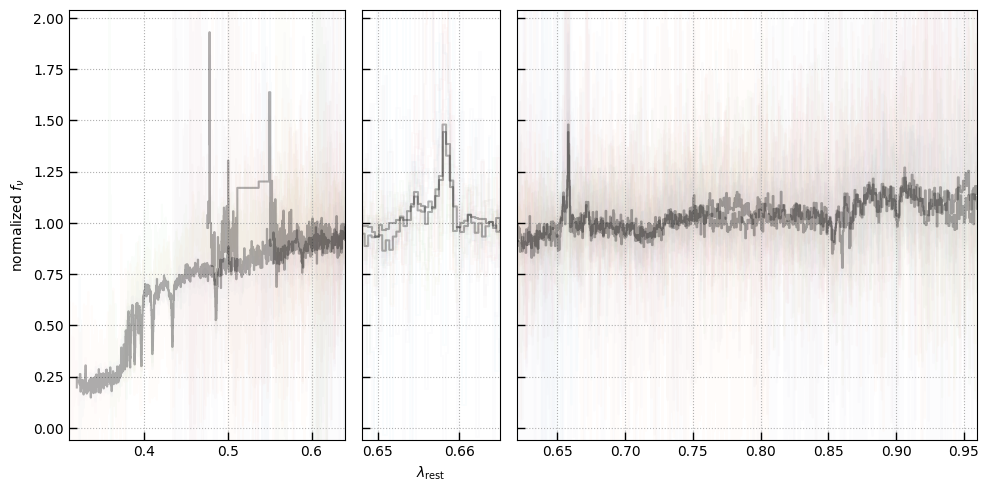

In [38]:
from scipy.stats import binned_statistic
import msaexp.utils

fig, axes = plt.subplots(1,3,figsize=(10,5), width_ratios=[0.6, 0.3, 1], sharey=True)

weighted_mean = {}

for key in grating_spectra:
    grating, filter = key

    if grating == 'G140M':
        continue
        
    full_spec = []

    in_grating = (tab['grating'] == grating) & (tab['filter'] == filter)

    # Sample with grating spectra that cover H-alpha
    nn_with_grating = np.isin(tab['objid'][in_grating], nn_objid)
    nn_with_grating &= (tab['line_ha_err'][in_grating] > 0) | (tab['line_oiii_5007_err'][in_grating] > 0)

    if nn_with_grating.sum() == 0:
        continue

    print(f'{grating}-{filter} N={nn_with_grating.sum()}')
    
    for j in np.where(nn_with_grating)[0]:

        wrest_j = grating_spectra[grating, filter]['wave'] / (1 + tab['z_best'][in_grating][j])
        
        flux_j = grating_spectra[grating, filter]['flux'][:,j] * 1
        err_j = grating_spectra[grating, filter]['err'][:,j] * 1 
        
        wsub = (wrest_j > 0.64) & (wrest_j < 0.68) & (err_j > 0)
        renorm_flux = np.median(flux_j[wsub])
        
        if 0:
            # Normalize to prism i band
            k = is_prism & (tab['objid'] == tab['objid'][in_grating][j])
            renorm_flux = np.nanmean(tab['rest_415_flux'][k])
        
        # print(renorm_flux, wsub.sum())
        # renorm_flux = 1.0
        
        flux_j /= renorm_flux
        err_j /= renorm_flux
        
        flux_j[err_j <= 0] = np.nan
        err_j[err_j <= 0] = np.nan

        # if np.nanmedian(err_j[wsub]) > 0.5:
        #     # Skip low S/N
        #     continue

        full_spec.append([wrest_j, flux_j, err_j])
        
        for ax in axes:
            ax.step(
                wrest_j,
                flux_j,
                alpha=0.02,
                zorder=-1,
            )

    # Bin by grating
    full_spec = np.array(full_spec)
    target_R = 1500
    wbin = 10**np.arange(*np.log10([0.3, 1.0]), 1./target_R/np.log(10))
    wbin_edge = msaexp.utils.array_to_bin_edges(wbin)

    wht = 1. / (full_spec[:,2,:]**2 + (0.1*full_spec[:,1,:])**2)
    
    num = binned_statistic(
        full_spec[:,0,:].flatten(),
        (full_spec[:,1,:] * wht).flatten(),
        bins=wbin_edge,
        statistic=np.nansum
    )
    
    denom = binned_statistic(
        full_spec[:,0,:].flatten(),
        wht.flatten(),
        bins=wbin_edge,
        statistic=np.nansum
    )

    wflux = num.statistic / denom.statistic
    werr = np.sqrt(1./denom.statistic)
    
    weighted_mean[key] = (wbin, wflux, werr)
    
    # optionally trim low S/N
    trim = wflux > 5 * werr
    
    for ax in axes:
        ax.step(wbin[trim], wflux[trim], color='k', alpha=0.3)

axes[0].set_xlim(0.31, 0.64)
axes[1].set_xlim(0.648, 0.665)
axes[2].set_xlim(0.62, 0.96)
ax.set_ylim(*(np.array([-0.03, 1.02])*2))

axes[0].set_ylabel(r'normalized $f_\nu$')
axes[1].set_xlabel(r'$\lambda_\mathrm{rest}$')

for ax in axes:
    ax.grid()

fig.tight_layout(pad=1)



# Grating line fluxes

Do some simple scatter plots of line ratios

## Simple OIII 4959/5007

OIII in grating spectra: 7040


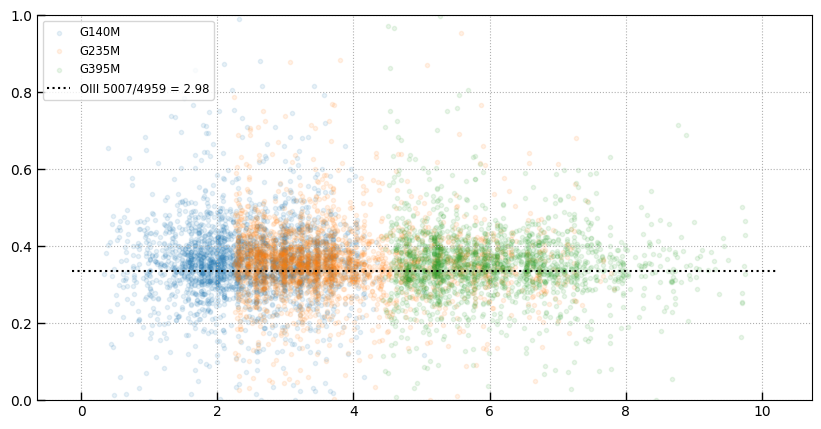

In [39]:
has_line = (
    (tab['line_oiii_5007'] > 5 * tab['line_oiii_5007_err'])
    & (tab['line_oiii_4959_err'] > 0)
    & (tab['grade'] == 3)
    & np.isin(tab['grating'], ['G140M', 'G235M', 'G395M'])
)
print(f'OIII in grating spectra: {has_line.sum()}')

ung = utils.Unique(tab['grating'], verbose=False)

fig, ax = plt.subplots(1,1,figsize=(10,5))

for grating in ung.values:
    test = has_line & ung[grating]
    if test.sum() == 0:
        continue
        
    ax.scatter(
        tab['zrf'][test], (tab['line_oiii_4959'] / tab['line_oiii_5007'])[test],
        alpha=0.1,
        label=grating,
    )

ax.hlines(1./2.98, *ax.get_xlim(), color='k', ls=":", label="OIII 5007/4959 = 2.98")

ax.legend(loc='upper left')
ax.set_ylim(0, 1)
ax.grid()


## Stellar mass vs grating [NII] / H$\alpha$

Rough tracer of the mass-metallicity relation.

Halpha in grating spectra: 6476


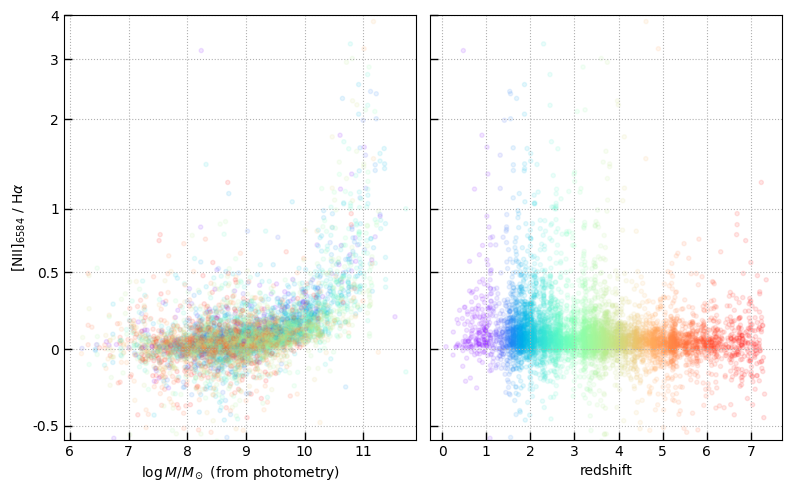

In [40]:

dz = np.abs(tab['zrf'] - tab['z_phot']) / (1+tab['zrf'])

has_line = (
    (tab['line_ha'] > 3 * tab['line_ha_err'])
    & (tab['line_nii_6584_err'] > 0)
    & (tab['grade'] == 3)
    & np.isin(tab['grating'], ['G140M', 'G235M', 'G395M'])
    & (np.abs(dz) < 0.1)
)

print(f'Halpha in grating spectra: {has_line.sum()}')

fig, axes = plt.subplots(1,2,figsize=(8, 5), sharey=True)

scale_func = np.arcsinh

kws = dict(
    c=np.log(1+tab['zrf'][has_line]),
    cmap='rainbow',
    vmin=np.log(1+1.0), vmax=np.log(1+7),
    alpha=0.1
)

axes[0].scatter(
    np.log10(tab['phot_mass'])[has_line],
    scale_func(tab['line_nii_6584'] / tab['line_ha'])[has_line],
    **kws
)

axes[1].scatter(
    tab['zrf'][has_line],
    scale_func(tab['line_nii_6584'] / tab['line_ha'])[has_line],
    **kws
)

ax = axes[0]
yt = [-0.5, 0, 0.5] + list(range(6))[1:]
ax.set_yticks(scale_func(yt))
ax.set_yticklabels(yt)

ax.set_ylim(*scale_func([-0.6, 4]))

ax.set_xlim(5.9, 11.9)
ax.set_xlabel(r'$\log M/M_\odot$ (from photometry)')
ax.set_ylabel(r'[NII]$_{6584}$ / H$\alpha$')
axes[1].set_xlabel('redshift')

for ax in axes:
    ax.grid()

fig.tight_layout(pad=1)


# Thumbnail API

The DJA thumbnail API can create thumbnail figures and FITS cutouts of a requested set of filters at a particular coordinate.M

In [41]:
from IPython.display import Image
print(RGB_URL.format(**row))
Image(url=RGB_URL.format(**row), height=300, width=300)


https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=2.0&asinh=True&filters=f115w-clear%2Cf277w-clear%2Cf444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.91554591%2C52.94901831


In [42]:
print(SLIT_URL.format(**row))
Image(url=SLIT_URL.format(**row), height=300, width=300)

https://grizli-cutout.herokuapp.com/thumb?size=1.5&scl=4.0&invert=True&filters=f444w-clear&rgb_scl=1.5%2C0.74%2C1.3&pl=2&coord=214.91554591%2C52.94901831&nirspec=True&dpi_scale=6&nrs_lw=0.5&nrs_alpha=0.8&metafile=jw04233006001
